In [1]:
from IPython.display import HTML # Versteckt Code auf Knopfdruck

HTML('''<script>
    function code_toggle() {
        if (code_shown){
            $('div.input').hide('500');
            $('#toggleButton').val('Show Code')
        } else {
            $('div.input').show('500');
            $('#toggleButton').val('Hide Code')
        }
        code_shown = !code_shown
    }

    $(document).ready(function(){
        code_shown = false;
        $('div.input').hide()
    });
    </script>
    <form action = "javascript:code_toggle()">
    <input type = "submit" id = "toggleButton" value = "Show Code">
    </form>''')

# Projekt 3 - Optimale Bahnstrecken
- **Datum:** 15.07.2024
- **Autor:** Dino Dervisevic, Andriy Ulyanenkov

## Aufgabe
In diesem großen Projekt beschäftigen Sie sich mit dem Problem, eine optimale Route in einem Netz mit vielen Optionen zu finden. Sie speichern und untersuchen wichtige Bahnverbindungen in Deutschland und entwickeln eine Möglichkeit, kürzeste Wege, günstige Optionen oder Reiseoptionen mit geringer Auslastung zu finden.

Ein Kürzeste-Wege-Problem, das jeder kennt, ist die Wahl des Fahrtweges zwischen 2 größeren Städten in Deutschland. Zunächst muss man sich über das Optimierungskriterium klar werden: Zeit, Preis, Auslastung, ...?
Mathematisch wird solch ein Problem folgendermaßen modelliert:

Gegeben:
- Graph $G = (V, E)$ (Knotenmenge $V$, Kantenmenge $E$)
- Nichtnegative Längen oder Gewichte wuv für alle Kanten $uv ∈ E$. Die Summe dieser Gewichte entlang des Weges soll minimiert werden.
- Zwei Knoten $s$ und $t$, zwischen denen der kürzeste Weg gefunden werden soll.

Das bekannteste Verfahren zur Berechnung kürzester Wege zwischen 2 Punkten ist der Dijkstra-Algorithmus. Zum Vergleich sollen Sie neben dem Dijkstra-Algorithmus auch den $A^{*}$-Algorithmus vorstellen.
## Aufgabenstellung
### Aufgabe 1
Erklären Sie das Vorgehen bei der Suche nach den kürzesten Wegen in einem gewichteten Graphen anhand des Dijkstra Algorithmus und implementieren Sie ein einfaches Beispiel in Sage Math.
### Aufgabe 2
Erzeugen Sie einen gewichteten Graphen mit Bahnverbindungen in Deutschland aus API-Aufrufen (Beispiel in Bahnverbindungen.ipynb) und speichern diesen in einer geeigneten Datenstruktur. Speichern Sie die Verbindungen für eine Anzahl der größten Städte in Deutschland ab. Wählen Sie als Gewicht der Kanten für einen fixen Zeitpunkt und Tag (z.B. 20.06.24 um 11:30) die Dauer der Reise (schnellste oder Durchschnitt), die Auslastung des Zuges und die Kosten. Begründen Sie die Wahl der Städte und die Verwendung der Datenstruktur.
### Aufgabe 3
Suchen Sie optimale Verbindungen (kürzeste Dauer) für Züge von Rostock nach Freiburg, von Kiel nach München und von Aachen nach Dresden anhand der Fahrzeit zwischen den benachbarten Städten. Vergleichen Sie dabei den Dijkstra- Algorithmus und den A*-Algorithmus
### Aufgabe 4
Überführen Sie Ihre Simulation in ein Tool, das Verbindungen zwischen zwei Städten als Graph anzeigt und die Fahrzeit, Auslastung oder Preis als Kriterien erlaubt.
### Aufgabe 5
Diskutieren Sie verschiedene Anwendungsszenarien undmögliche Erweiterungen für Ihr Tool. Welche Rundreise für Touristen durch Deutschland kann man mit wenig Auslastung und zu guten Preisen anbieten. Welche Routen sollte ein neuer Bahnbetreiber wählen, um Strecken mit hoher Auslastung und guten Preisen zu bedienen.



## Vorgaben
- Eineine Verbindung ist nur einfach, also München nach Ulm ist die Strecke München-Augsburg-Ulm. Wir speichern jeweils nur die Preise zwischen München und Augsburg sowie zwischen Augsburg und Ulm.
- Wir speichern  die Bahnverbindungen für einen Termin in der Zukunft und nutzen diese Datengrundlage.

# Aufgabe 1 - Dijkstra Beispiel
## Problemdefinition und Lösungsansätze

### **Problemdefinition**:
**Teil 1**:
- Ein Graph wird benötigt, um den Dijkstra-Algorithmus zu erläutern.

**Teil 2**:
- Zur Simulation des deutschen Bahnnetzes müssen wir zwei unterschiedliche Kanten zwischen Städten erstellen können, da die Verbindungen nicht in beiden Richtungen gleichwertig sind.

### **Lösungsansatz**:
**Teil 1**:
- Inspiration aus dem Spiel "Zug um Zug".
- Erstellung von Kanten zwischen Städten, denen spezifische Gewichte zugewiesen werden.
- Schätzung der Koordinaten der Knoten (Städte) zur Visualisierung.
- Entwicklung einer Klasse zur Visualisierung des Graphen (Bahnnetz).
- Übertragung der Kantengewichte in eine Adjazenzmatrix.
- Implementierung einer Dijkstra-Klasse, die den Algorithmus anwendet.
- Anwendung des Dijkstra-Algorithmus auf die Adjazenzmatrix.
- Erweiterung der Visualisierungsklasse, um den Verlauf des Dijkstra-Algorithmus darzustellen.

**Teil 2**:
- Erneute Simulation von Knoten und Kanten mit Berücksichtigung beider Richtungen.
- Entwicklung einer Klasse zur Visualisierung eines Graphen mit bidirektionalen Kanten.
- Anpassung des Dijkstra-Algorithmus, um die richtige Kantenrichtung zu berücksichtigen.

# Der Dijkstra-Algorithmus[7][9]

## Einführung

Der Dijkstra-Algorithmus ist ein Algorithmus zur Bestimmung der kürzesten Pfade von einem Startknoten zu allen anderen Knoten in einem gewichteten Graphen. Der Graph darf keine negativen Kantengewichte enthalten. Der Algorithmus wurde 1956 von dem niederländischen Informatiker Edsger W. Dijkstra entwickelt.

## Grundprinzip

Der Dijkstra-Algorithmus verwendet eine Prioritätswarteschlange, um die Knoten nach ihrer Entfernung vom Startknoten zu verwalten. Der Algorithmus arbeitet iterativ und verbessert schrittweise die geschätzten Entfernungen zu den anderen Knoten, bis die kürzesten Pfade gefunden sind.

## Algorithmus

### Initialisierung

1. Setze den Abstand zum Startknoten auf 0: $d(s) = 0$.
2. Setze den Abstand zu allen anderen Knoten auf unendlich: $d(v) = \infty$ für alle $v \neq s$.
3. Markiere alle Knoten als unbesucht und füge sie in eine Prioritätswarteschlange $Q$ ein.
4. Setze den Vorgängerknoten jedes Knotens auf `undefined`.

### Hauptschleife

1. Solange die Warteschlange $Q$ nicht leer ist:
   1. Wähle den Knoten $u$ aus $Q$ mit dem kleinsten Abstand $d(u)$.
   2. Entferne $u$ aus $Q$.
   3. Für jeden Nachbarn $v$ von $u$:
      1. Berechne den alternativen Pfad $alt$ durch $u$ nach $v$: $alt = d(u) + w(u, v)$, wobei $w(u, v)$ das Gewicht der Kante $(u, v)$ ist.
      2. Wenn $alt < d(v)$:
         1. Setze $d(v) = alt$.
         2. Setze den Vorgängerknoten von $v$ auf $u$.

### Komplexität

Die Laufzeitkomplexität des Dijkstra-Algorithmus hängt von der Implementierung der Prioritätswarteschlange ab. Bei Verwendung eines binären Heaps beträgt die Komplexität $O((V + E) \log V)$, wobei $V$ die Anzahl der Knoten und $E$ die Anzahl der Kanten im Graphen ist.



## Beispielaufgabe, um den Dijkstra Algorithmus darzustellen[1][6]:

#### Die Landkarte des Brettspiels "Zug um Zug Deutschland" wurde als ein zusammenhängender Graph modeliert.

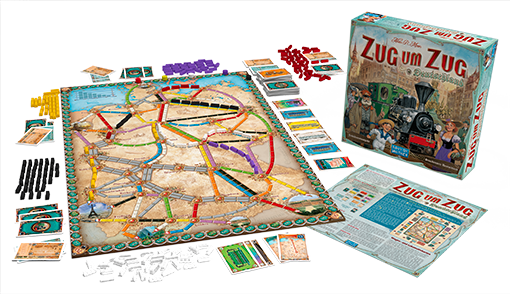

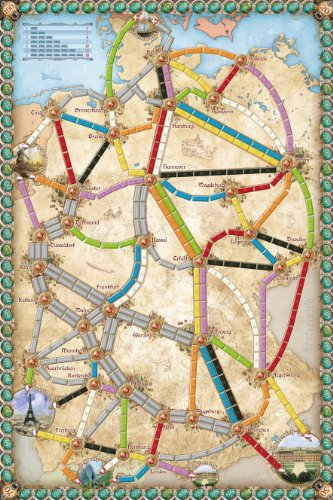

### Überblick [3][4]

Diese Simulation modelliert das Netzwerk der Bahnverbindungen zwischen verschiedenen Städten aus Zug um Zug. Dabei werden die Städte als Knoten und die Verbindungen zwischen ihnen als gewichtete Kanten dargestellt. Die Gewichtung der Kanten basiert auf eine geschätzte Distanz, die die Verbindung zwischen zwei Städten beeinflussen.

### Positionen der Knoten

Die Positionen der Knoten (Städte) werden basierend auf geschätzten Koordinaten festgelegt. Dies dient der Visualisierung des Graphen und erleichtert das Verständnis der geographischen Lage der Städte.

### Visualisierung

Die Visualisierung des Graphen erfolgt mithilfe der networkx- und matplotlib-Bibliotheken. Die Knotenpositionen und die gewichteten Kanten werden verwendet, um den Graphen darzustellen und die Verbindungen zwischen den Städten zu veranschaulichen.

#### Importierte Bibliotheken

- time: Für Zeitsteuerung und -messung innerhalb der Simulation.
- IPython.display: Für die dynamische Anzeige und Aktualisierung der Ausgabe während der Simulation.
- matplotlib.pyplot: Für die Visualisierung des Graphen.
- networkx: Für die Erstellung und Verwaltung von Graphen.

In [2]:
import time
from IPython.display import display, clear_output
import matplotlib.pyplot as plt
import networkx as nx


# Definieren der gewichteten Kanten basierend auf dem Spiel
game_edges = [
    ('Emden', 'Bremen', 3),
    ('Bremen', 'Bremerhaven', 1),
    ('Bremerhaven', 'Hamburg', 3),
    ('Hamburg', 'Kiel', 2),
    ('Hamburg', 'Schwerin', 2),
    ('Schwerin', 'Rostock', 2),
    ('Kiel', 'Rostock', 4),
    ('Hannover', 'Magdeburg', 4),
    ('Magdeburg', 'Berlin', 3),
    ('Magdeburg', 'Leipzig', 2),
    ('Leipzig', 'Dresden', 3),
    ('Leipzig', 'Erfurt', 3),
    ('Erfurt', 'Nürnberg', 4),
    ('Nürnberg', 'Würzburg', 2),
    ('Würzburg', 'Frankfurt', 2),
    ('Frankfurt', 'Kassel', 4),
    ('Kassel', 'Hannover', 3),
    ('Frankfurt', 'Mannheim', 2),
    ('Mannheim', 'Karlsruhe', 1),
    ('Karlsruhe', 'Stuttgart', 1),
    ('München', 'Augsburg', 2),
    ('Augsburg', 'Nürnberg', 4),
    ('Nürnberg', 'Regensburg', 3),
    ('Regensburg', 'München', 3),
    ('Münster', 'Bremen', 3),
    ('Münster', 'Dortmund', 1),
    ('Dortmund', 'Düsseldorf', 1),
    ('Düsseldorf', 'Köln', 1),
    ('Köln', 'Frankfurt', 4),
    ('Köln', 'Koblenz', 1),
    ('Saarbrücken', 'Karlsruhe', 3),
    ('Saarbrücken', 'Mainz', 3),
    ('Frankfurt', 'Mainz', 1),
    ('Mainz', 'Koblenz', 2),
    ('Leipzig', 'Chemnitz', 2),
    ('Chemnitz', 'Dresden', 1),
    ('Freiburg', 'Karlsruhe', 3),
    ('Freiburg', 'Stuttgart', 3),
    ('Freiburg', 'Konstanz', 2),
    ('Stuttgart', 'Ulm', 2),
    ('Ulm', 'Augsburg', 1),
    ('Konstanz', 'Lindau', 1),
    ('Lindau', 'München', 5),
    ('Bremerhaven', 'Emden', 3),
    ('Kiel', 'Bremerhaven', 3),
    ('Kiel', 'Hamburg', 2),
    ('Bremen', 'Hamburg', 3),
    ('Hamburg', 'Berlin', 7),
    ('Berlin', 'Dresden', 5),
    ('Berlin', 'Leipzig', 4),
    ('Leipzig', 'Erfurt', 3),
    ('Erfurt', 'Kassel', 3),
    ('Kassel', 'Dortmund', 4),
    ('Mannheim', 'Stuttgart', 2),
    ('Stuttgart', 'Konstanz', 3),
    ('München', 'Nürnberg', 4),
    ('München', 'Regensburg', 3),
    ('Regensburg', 'Chemnitz', 6),
    ('Chemnitz', 'Leipzig', 2),
    ('Leipzig', 'Magdeburg', 2),
    ('Magdeburg', 'Berlin', 3),
    ('Rostock', 'Berlin', 6),
    ('Schwerin', 'Berlin', 5),
    ('Hamburg', 'Hannover', 3),
    ('Schwerin', 'Kiel', 3),
    ('Bremen', 'Hannover', 3),
    ('Berlin', 'Hannover', 7),
    ('Erfurt', 'Chemnitz', 4),
    ('Emden', 'Münster', 4),
    ('Hannover', 'Münster', 4),
    ('Hannover', 'Erfurt', 5),
    ('Regensburg', 'Erfurt', 7),
    ('Ulm', 'Lindau', 2),
    ('Mannheim', 'Mainz', 1),
    ('Koblenz', 'Saarbrücken', 3),
    ('Saarbrücken', 'Mannheim', 3),
    ('Regensburg', 'Dresden', 7),
    ('Aachen', 'Köln', 1)
]

# Knotenpositionen basierend auf der Karte festlegen
pos = {
    'Emden': (1, 8),
    'Bremen': (3, 8),
    'Bremerhaven': (3, 9),
    'Hamburg': (5, 9),
    'Kiel': (5, 11),
    'Schwerin': (7, 9),
    'Rostock': (8.5, 10),
    'Hannover': (5, 7),
    'Magdeburg': (7, 6.5),
    'Berlin': (9, 7),
    'Leipzig': (7, 5),
    'Dresden': (9, 4.5),
    'Erfurt': (6, 4),
    'Nürnberg': (6, 2.5),
    'Würzburg': (5, 3),
    'Frankfurt': (4, 3),
    'Kassel': (5, 5),
    'Mannheim': (2.5, 2),
    'Karlsruhe': (2, 1.5),
    'Stuttgart': (3, 1.5),
    'München': (6, 1),
    'Augsburg': (5, 1),
    'Regensburg': (7, 1.5),
    'Münster': (2, 7),
    'Dortmund': (2, 5.5),
    'Düsseldorf': (1, 5),
    'Köln': (1, 4),
    'Koblenz': (1, 3),
    'Saarbrücken': (1, 2),
    'Mainz': (2.5, 2.5),
    'Chemnitz': (8, 4),
    'Freiburg': (2, 0.5),
    'Konstanz': (3, 0),
    'Lindau': (4, 0),
    'Ulm': (4, 1),
    'Aachen': (0, 4)

}


In [3]:
import time

#Klasse für die Visualisierung des Graphen und des Algorithmus
class Visualization:
    #Konstruktor
    def __init__(self, edges, pos): 
        self.G_nx = nx.Graph() #Graph
        # Die Schleife erstellt die Kanten und Knoten des Graphen
        for edge in edges:
            if edge[0] in pos and edge[1] in pos:
                self.G_nx.add_edge(edge[0], edge[1], weight=edge[2])
        self.pos = pos # Positionen der Knoten
        self.initial_color = 'lightblue' #Farbe am Anfang
        self.node_colors = {node: self.initial_color for node in self.G_nx.nodes()}

        # zeigt den Graphen (nur für innere Nutzung ausgelegt)
    def draw_graph(self, G, size=12):
        plt.figure(figsize=(size, size))
        nx.draw(G, self.pos, with_labels=True, node_size=800, node_color=list(self.node_colors.values()), font_size=10, font_weight='bold')
        labels = nx.get_edge_attributes(G, 'weight')
        nx.draw_networkx_edge_labels(G, self.pos, edge_labels=labels)
        display(plt.gcf())
        plt.close()
        
        # ruft die draw_graph Funktion (für die Benutzung in anderen Klassen)
    def draw(self):
        self.draw_graph(self.G_nx)

        # ändert die Farbe eines Graphens
    def change_node_color(self, node, color):
        global node_colors
        if node in self.node_colors:
            self.node_colors[node] = color
            clear_output(wait=True)
            self.draw_graph(self.G_nx)
        else:
            print(f"Node {node} does not exist in the graph.")
        
        # Visualisiert die Ausbreitung des Algorithmus (chain) und zeigt den optimalsten Weg (path)
    def show_spread(self, chain, path):
        self.draw()
        length = len(chain)
        self.change_node_color(chain[0], 'green')    
        for i in range(1, length):
            time.sleep(1)
            self.change_node_color(chain[i], 'yellow')   
        self.change_node_color(path[-1], 'red')
        for i in range(1, len(path)-1):
            time.sleep(1)
            self.change_node_color(path[i], 'orange') 
            

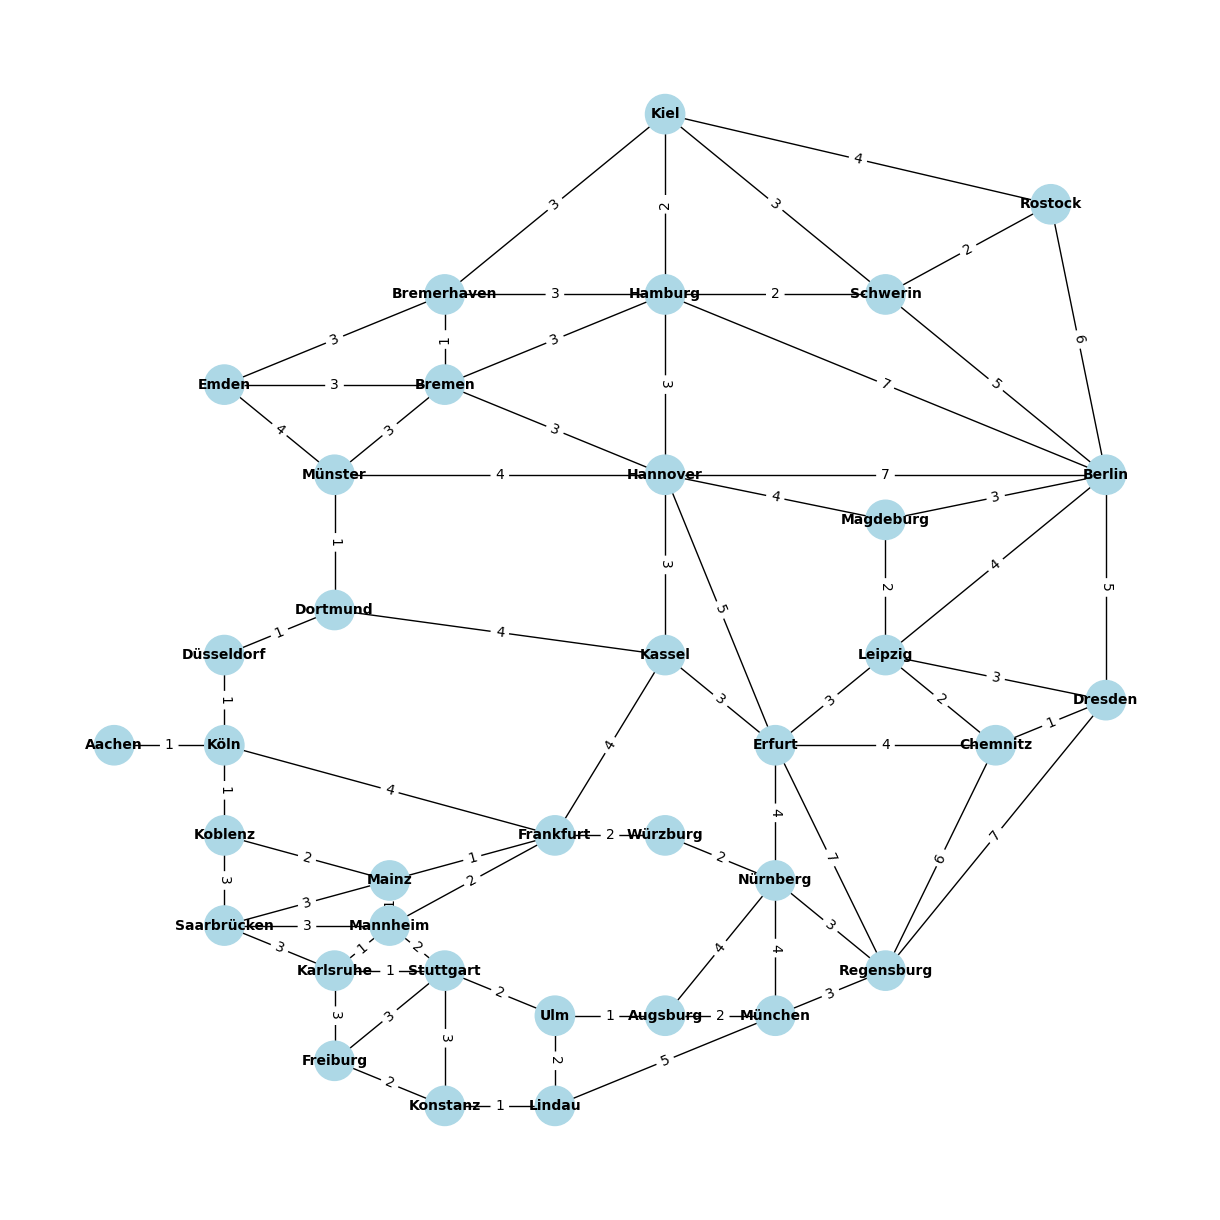

In [4]:
# Ursprünglichen Graphen anzeigen
vis = Visualization(game_edges, pos)
vis.draw()
#vis.show_spread(['Kassel', 'Erfurt', 'Frankfurt'], 'Würzburg')

### gewichteten Adjazenzmatrix[5]
- Für eine leichtere und schnellere Implementation erstellen wir eine Adjanzenmatrix für die Kantengewichte zwischen Knoten
- Jedem Knoten wird ein fester Index zugeteilt

In [5]:
# Berechnen der gewichteten Adjazenzmatrix
A = nx.adjacency_matrix(vis.G_nx, weight='weight')
A_matrix = Matrix(A.toarray())

# Erstellen eines Dictionary, das die Zuordnung von Knoten zu Zeilen und Spalten der Matrix zeigt
node_to_index = {node: idx for idx, node in enumerate(vis.G_nx.nodes())}
index_to_node = {idx: node for idx, node in enumerate(vis.G_nx.nodes())}

def city(city): return node_to_index.get(city)
def index(index): return index_to_node.get(index)

# Anzeigen der gewichteten Adjazenzmatrix und des Dictionary
print("Gewichtete Adjazenzmatrix:")
print(A_matrix)

Gewichtete Adjazenzmatrix:
[0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
[3 0 1 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0]
[3 1 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 3 3 0 2 2 0 3 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 3 2 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 2 3 0 2 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 4 2 0 0 0 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 3 0 3 0 0 0 0 4 7 0 0 5 0 0 0 3 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 4 0 3 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 7 0 5 6 7 3 0 4 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 2 4 0 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 5 3 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 1 0 0 0 0 0]
[0 0 0 0 0 0 0 5 0 0 3 0 0 4 0 0 3 0 0 0 0 0 7 0 0 0 0 0 0 0 4 0 0 0 0 0]
[0 0 0 0 0 

## Implementation von Dijskra mit Beispiel Kassel-Konstanz

In [6]:
import networkx as nx

class Dijkstra:
    def __init__(self, edges, directed:bool, start_city, risk:bool=False):
        self.risk = risk
        if directed:
            self.G = nx.DiGraph()
        else:
            self.G = nx.Graph()
        for edge in edges:
            self.G.add_edge(edge[0], edge[1], weight=edge[2])
        self.node_to_index = {node: idx for idx, node in enumerate(self.G.nodes())}
        self.index_to_node = {idx: node for idx, node in enumerate(self.G.nodes())}
        A = nx.adjacency_matrix(self.G, weight='weight')
        self.A_matrix = A.toarray()
        self.length = len(self.A_matrix[0])
        self.start_city = start_city
        self.costs, self.prevs, self.visited = self.dijkstra(start_city)
    
    # Übersetzung von Stadtnamen in den Index
    def city(self, city): 
        return self.node_to_index.get(city)
    
    # Übersetzung von Index in den Stadtnamen
    def index(self, index): 
        return self.index_to_node.get(index)
    
    # Nachfolger des Knotens bestimmen
    def get_succesors(self, index, visited):
        arr = []
        for i in range(self.length):
            if self.A_matrix[index][i] != 0 and i not in visited:
                arr.append(i)
        return arr
    
    # Anfansinitialisirung des Algorithmus
    def initialize_start(self, index):
        arr = []
        for i in range(self.length):
            if i == index:
                arr.append(0)
            else:
                arr.append(Infinity)
        return arr

    # Die Berechnungsfunktion, Aktualisierung der Wegkosten
    def actualize_costs(self, index, costs, prevs, succesors):
        self_cost = costs[index]
        if not self.risk:
            for i in range(self.length):
                new_cost = self.A_matrix[index][i] + self_cost
                if new_cost < costs[i] and i in succesors:
                    costs[i] = new_cost
                    prevs[i] = index
        else:
            for i in range(self.length):
                costs_sum, amount = self.get_costs_sum(i, prevs, costs)
                new_cost = (self.A_matrix[index][i] + costs_sum) / (amount)
                if new_cost < costs[i] and i in succesors:
                    costs[i] = new_cost
                    prevs[i] = index
            
        return costs, prevs
    
    # Um die durchschnittliche Auslastung zu berechnen, berechnet man die Summe der Vorherigen und ihre Anzahl
    def get_costs_sum(self, index, prevs, costs):
        chain = self.get_chain(index, prevs)
        res = 0
        amount = len(chain)
        for i in range(amount-1):
            res += self.A_matrix[chain[i]][chain[i+1]]
        if amount > 1:
            amount -= 1
        return res, amount
        
    # Der klassische Dijkstra Algorithmus:
    # Vom Startpunkt aus itiert der Algorithmus bis alle Knoten im Graphensystem abgeschlossen sind
    def dijkstra(self, start_city):
        start = self.city(start_city)
        queue = [start]
        visited = []
        costs = self.initialize_start(start)
        prevs = [-1 for _ in range(self.length)] # -1 stands for None
        
        while queue:
            iteration_succesors = []
            for e in queue:
                current_succesors = self.get_succesors(e, visited)
                costs, prevs = self.actualize_costs(e, costs, prevs, current_succesors)
                visited.append(e)
                iteration_succesors.extend(current_succesors)
            queue = iteration_succesors
        
        return costs, prevs, visited
    
    # Der 'gezielte' Algorithmus:
    # Vom Startpunkt aus iteriert er solnage, bis der Zeilpunkt abgesclossen ist
    def dijkstra_target(self, start_city, target_city):
        start = self.city(start_city)
        target = self.city(target_city)
        queue = [start]
        visited = []
        costs = self.initialize_start(start)
        prevs = [-1 for _ in range(self.length)] # -1 stands for None
        counter = 0
        while queue:
            iteration_succesors = []
            for e in queue:
                if e in visited:
                    continue
                counter += 1
                current_succesors = self.get_succesors(e, visited)
                # ends when reaches the target
                if target == e: #
                    return costs, prevs, counter, visited
                costs, prevs = self.actualize_costs(e, costs, prevs, current_succesors)
                visited.append(e)
                # maybe it should end here...
                iteration_succesors.extend(current_succesors)
            queue = iteration_succesors    
        return costs, prevs, counter, visited
    
    # Funktion für die Rückgabe der optimalsten Wege
    def efficient_path(self, start, end):
        self.costs, self.prevs, iterations, visited = self.dijkstra_target(start, end)
        path = self.get_path(self.city(end))
        print(f'Best way to get from {start} to {end}\nThe path: {path}\nIterations: {iterations}\nCosts: {self.costs[self.city(end)]}')
        return self.translate_chain(visited), path, iterations, self.costs[self.city(end)]
    
       # Folgende, mit A4 gekennzeichnete Funtionen werden für die Aufgabe 4 gebraucht
    def get_path_data(self, start, end):
            self.costs, self.prevs, iterations, visited = self.dijkstra_target(start, end)
            path = self.get_path(self.city(end))
            chain = self.get_chain(self.city(end), self.prevs)
            return path, chain, self.costs[self.city(end)]
        
        #A4
    def get_real_cost(self, chain):
        if not self.risk:
            res = 0
            curr = chain[0]
            for i in range(len(chain)-1):
                e = chain[i]
                n_e = chain[i+1]
                res += self.A_matrix[e][n_e]

        else:
            #chain = self.get_chain(index, prevs)
            res = 0
            amount = len(chain)
            for i in range(amount-1):
                res += self.A_matrix[chain[i]][chain[i+1]]
            if amount > 1:
                amount -= 1
            res = res / amount
        return res
    
    # Den Weg von Start nach Ende als Kette (Liste aus Indizien) ausrechnen über die Liste der Vorgänger ausrechnen lassen
    def get_chain(self, end, prevs):
        arr = [end]
        curr = end
        for i in range(self.length):
            prev = prevs[curr]
            if prev == -1:
                break
            else:
                arr.append(prev)
            curr = prev
        arr.reverse()
        return arr
    
    # Übersetzung aus Indizien in die Städtenamen
    def translate_chain(self, chain):
        arr = []
        for e in chain:
            arr.append(self.index(e))
        return arr
            
    # Den Weg als Liste aus Strings ausrechnen lassen
    def get_path(self, end):
        return self.translate_chain(self.get_chain(end, self.prevs))
    
    # Die Ergebnisse des kompletten Algorithmusverlaufs
    def print_dijkstra(self):
        index_arr = [i for i in range(self.length)]
        
        print(f"{'City':<15} {'Cost':<15} {'Prev City'}")
        print("=" * 42)

        for i in range(len(self.A_matrix[0])):
            if self.prevs[i] == -1:
                prev = None
            else:
                prev = self.index(self.prevs[i])
            print(f'{self.index(index_arr[i]):<15} {self.costs[i]:<15} {prev}')
            

In [7]:
# Create an instance of the Dijkstra class
dijkstra_solver = Dijkstra(game_edges, False, 'Kassel')

# Print the results
vis_cities, path, iterations, cost = dijkstra_solver.efficient_path('Kassel', 'Konstanz')

Best way to get from Kassel to Konstanz
The path: ['Kassel', 'Frankfurt', 'Mannheim', 'Stuttgart', 'Konstanz']
Iterations: 36
Costs: 11


### Auswertung des Ergebnisses des Dijkstra-Algorithmus

#### Optimale Route von Kassel nach Konstanz
Der Dijkstra-Algorithmus wurde angewendet, um die beste Route von Kassel nach Konstanz zu bestimmen. Die ermittelte optimale Route ist wie folgt:

**Pfad:** Kassel → Frankfurt → Mannheim → Stuttgart → Konstanz

#### Details der Berechnungen
- **Anzahl der Iterationen:** 36
- **Besuchte Knoten:** Der Algorithmus hat insgesamt 36 Knoten besucht, um die kürzeste Verbindung zu finden. Dies zeigt die Effizienz des Dijkstra-Algorithmus bei der Erkundung eines großen Netzwerks, um die kürzeste Strecke zu identifizieren.

#### Besuchte Knoten
Die Knoten, die während des Prozesses besucht wurden, sind:
Kassel, Hannover, Erfurt, Frankfurt, Dortmund, Bremen, Hamburg, Magdeburg, Berlin, Münster, Leipzig, Nürnberg, Regensburg, Chemnitz, Würzburg, Mannheim, Köln, Mainz, Düsseldorf, Emden, Bremerhaven, Kiel, Schwerin, Rostock, Dresden, München, Augsburg, Karlsruhe, Stuttgart, Saarbrücken, Koblenz, Aachen, Lindau, Ulm, Freiburg

Diese Knoten repräsentieren die Städte, die der Algorithmus in Betracht gezogen hat, um die optimale Route zu berechnen. 

#### Interpretation der Ergebnisse
- **Direktheit der Route:** Die gefundene Route ist nicht nur die kürzeste, sondern auch eine direkte Verbindung, die größere Umwege vermeidet. Dies zeigt die Effektivität des Algorithmus bei der Minimierung der Reisekosten (z.B. Zeit, Entfernung).
- **Verlässlichkeit der Methode:** Der Dijkstra-Algorithmus hat alle relevanten Verbindungen untersucht, um sicherzustellen, dass keine kürzere Route übersehen wurde.


## Visualisierung des Algorithmus **[LIVE*]** [3][4]
Um die Visualisierung anzeigen zu lassen, kommentieren Sie die untere Codezeile aus

In [8]:
vis_d = Visualization(game_edges, pos)
#vis_d.show_spread(vis_cities, path)

# Dijkstra in Deutschland

Im folgenden Entwurf analysieren wir realistische Szenarien im deutschen Bahnnetz. Dabei berücksichtigen wir zwei wesentliche Faktoren:

1. **Asymmetrische Verbindungen:** 
   Die Verbindung von Stadt A nach Stadt B unterscheidet sich in der Regel von der Verbindung von Stadt B nach Stadt A.
   - **Lösungsansatz:** Zwischen je zwei Städten speichern wir zwei Kanten mit unterschiedlichen Gewichten, abhängig von der Fahrtrichtung.

2. **Eingeschränkte Direktverbindungen:** 
   In der Realität gibt es nicht immer direkte Verbindungen zwischen benachbarten Städten.
   - **Beispiel:** Eine direkte Verbindung zwischen Karlsruhe und Saarbrücken existiert nicht. Züge von Karlsruhe nach Saarbrücken fahren immer über Mannheim.
   - **Lösungsansatz:** Löschen von unrealistischen Verbindungen, um die Simulation realistischer zu gestalten.



In [9]:
edges_real = [
    ('Bremen', 'Bremerhaven', 1), ('Bremerhaven', 'Bremen', 1),
    ('Bremerhaven', 'Hamburg', 3), ('Hamburg', 'Bremerhaven', 3),
    ('Hamburg', 'Kiel', 2), ('Kiel', 'Hamburg', 2),
    ('Hamburg', 'Schwerin', 2), ('Schwerin', 'Hamburg', 2),
    ('Schwerin', 'Rostock', 2), ('Rostock', 'Schwerin', 2),
    ('Hannover', 'Magdeburg', 4), ('Magdeburg', 'Hannover', 4),
    ('Magdeburg', 'Berlin', 3), ('Berlin', 'Magdeburg', 3),
    ('Magdeburg', 'Leipzig', 2), ('Leipzig', 'Magdeburg', 2),
    ('Leipzig', 'Dresden', 3), ('Dresden', 'Leipzig', 3),
    ('Leipzig', 'Erfurt', 3), ('Erfurt', 'Leipzig', 3),
    ('Erfurt', 'Nürnberg', 4), ('Nürnberg', 'Erfurt', 4),
    ('Nürnberg', 'Würzburg', 2), ('Würzburg', 'Nürnberg', 2),
    ('Würzburg', 'Frankfurt', 2), ('Frankfurt', 'Würzburg', 2),
    ('Frankfurt', 'Kassel', 4), ('Kassel', 'Frankfurt', 4),
    ('Kassel', 'Hannover', 3), ('Hannover', 'Kassel', 3),
    ('Frankfurt', 'Mannheim', 2), ('Mannheim', 'Frankfurt', 2),
    ('Mannheim', 'Karlsruhe', 1), ('Karlsruhe', 'Mannheim', 1),
    ('Karlsruhe', 'Stuttgart', 1), ('Stuttgart', 'Karlsruhe', 1),
    ('München', 'Augsburg', 2), ('Augsburg', 'München', 2),
    ('Augsburg', 'Nürnberg', 4), ('Nürnberg', 'Augsburg', 4),
    ('Nürnberg', 'Regensburg', 3), ('Regensburg', 'Nürnberg', 3),
    ('Regensburg', 'München', 3), ('München', 'Regensburg', 3),
    ('Münster', 'Bremen', 3), ('Bremen', 'Münster', 3),
    ('Münster', 'Dortmund', 1), ('Dortmund', 'Münster', 1),
    ('Dortmund', 'Düsseldorf', 1), ('Düsseldorf', 'Dortmund', 1),
    ('Düsseldorf', 'Köln', 1), ('Köln', 'Düsseldorf', 1),
    ('Köln', 'Frankfurt', 4), ('Frankfurt', 'Köln', 4),
    ('Köln', 'Koblenz', 1), ('Koblenz', 'Köln', 1),
    ('Saarbrücken', 'Mainz', 3), ('Mainz', 'Saarbrücken', 3),
    ('Frankfurt', 'Mainz', 1), ('Mainz', 'Frankfurt', 1),
    ('Mainz', 'Koblenz', 2), ('Koblenz', 'Mainz', 2),
    ('Leipzig', 'Chemnitz', 2), ('Chemnitz', 'Leipzig', 2),
    ('Chemnitz', 'Dresden', 1), ('Dresden', 'Chemnitz', 1),
    ('Freiburg', 'Karlsruhe', 3), ('Karlsruhe', 'Freiburg', 3),
    ('Freiburg', 'Konstanz', 2), ('Konstanz', 'Freiburg', 2),
    ('Stuttgart', 'Ulm', 2), ('Ulm', 'Stuttgart', 2),
    ('Ulm', 'Augsburg', 1), ('Augsburg', 'Ulm', 1),
#     ('Konstanz', 'Lindau', 1), ('Lindau', 'Konstanz', 1),
#     ('Lindau', 'München', 5), ('München', 'Lindau', 5),
    # Neue Verbindungen basierend auf dem Bild
    ('Kiel', 'Hamburg', 2), ('Hamburg', 'Kiel', 2),
    ('Bremen', 'Hamburg', 3), ('Hamburg', 'Bremen', 3),
    ('Hamburg', 'Berlin', 7), ('Berlin', 'Hamburg', 7),
    ('Berlin', 'Dresden', 5), ('Dresden', 'Berlin', 5),
    ('Berlin', 'Leipzig', 4), ('Leipzig', 'Berlin', 4),
    ('Leipzig', 'Erfurt', 3), ('Erfurt', 'Leipzig', 3),
    ('Erfurt', 'Kassel', 3), ('Kassel', 'Erfurt', 3),
    ('Kassel', 'Dortmund', 4), ('Dortmund', 'Kassel', 4),
    ('Mannheim', 'Stuttgart', 2), ('Stuttgart', 'Mannheim', 2),
    ('Stuttgart', 'Konstanz', 3), ('Konstanz', 'Stuttgart', 3),
    ('München', 'Nürnberg', 4), ('Nürnberg', 'München', 4),
    ('München', 'Regensburg', 3), ('Regensburg', 'München', 3),
    ('Regensburg', 'Hof', 5), ('Hof', 'Regensburg', 5),
    ('Chemnitz', 'Leipzig', 2), ('Leipzig', 'Chemnitz', 2),
    ('Leipzig', 'Magdeburg', 2), ('Magdeburg', 'Leipzig', 2),
    ('Magdeburg', 'Berlin', 3), ('Berlin', 'Magdeburg', 3),
    # Neue von mir
    ('Rostock', 'Berlin', 6), ('Berlin', 'Rostock', 6),
    ('Schwerin', 'Berlin', 5), ('Berlin', 'Schwerin', 5),
    ('Hamburg', 'Hannover', 3), ('Hannover', 'Hamburg', 3),
#     ('Schwerin', 'Kiel', 3), ('Kiel', 'Schwerin', 3),
    ('Bremen', 'Hannover', 3), ('Hannover', 'Bremen', 3),
    ('Erfurt', 'Chemnitz', 4), ('Chemnitz', 'Erfurt', 4),
    ('Hannover', 'Münster', 4), ('Münster', 'Hannover', 4),
#     ('Ulm', 'Lindau', 2), ('Lindau', 'Ulm', 2),
    ('Mannheim', 'Mainz', 1), ('Mainz', 'Mannheim', 1),
    ('Koblenz', 'Saarbrücken', 3), ('Saarbrücken', 'Koblenz', 3),
    ('Saarbrücken', 'Mannheim', 3), ('Mannheim', 'Saarbrücken', 3),
    ('Aachen', 'Köln', 1), ('Köln', 'Aachen', 1),
    ('Hof', 'Chemnitz', 1), ('Chemnitz', 'Hof', 1),
    ('Hof', 'Nürnberg', 2), ('Nürnberg', 'Hof', 2),
    ('Erfurt', 'Würzburg', 2), ('Würzburg', 'Erfurt', 2),
    ('Köln', 'Dortmund', 2), ('Dortmund', 'Köln', 2),
    ('Dortmund', 'Hannover', 4), ('Hannover', 'Dortmund', 4),
    ('München', 'Rosenheim', 2), ('Rosenheim', 'München', 2),
    ('Lübeck', 'Hamburg', 1), ('Hamburg', 'Lübeck', 1),
    ('Lübeck', 'Kiel', 1), ('Kiel', 'Lübeck', 1),
    ('Lübeck', 'Schwerin', 1), ('Schwerin', 'Lübeck', 1)
]
# Knotenpositionen basierend auf der Karte festlegen
pos_directed = {
     'Bremen': (21, 56),
     'Bremerhaven': (21, 63),
     'Hamburg': (35, 63),
     'Kiel': (35, 77),
     'Schwerin': (49, 63),
     'Rostock': (59.5000000000000, 70),
     'Hannover': (35, 49),
     'Magdeburg': (49, 45.5000000000000),
     'Berlin': (63, 49),
     'Leipzig': (49, 35),
     'Dresden': (63, 31.5000000000000),
     'Erfurt': (42, 28),
     'Nürnberg': (42, 17.5000000000000),
     'Würzburg': (35, 21),
     'Frankfurt': (28, 25),
     'Kassel': (35, 35),
     'Mannheim': (17.5000000000000, 14),
     'Karlsruhe': (14, 10.5000000000000),
     'Stuttgart': (21, 10.5000000000000),
     'München': (42, 7),
     'Augsburg': (35, 7),
     'Regensburg': (49, 10.5000000000000),
     'Münster': (14, 49),
     'Dortmund': (14, 38.5000000000000),
     'Düsseldorf': (7, 35),
     'Köln': (7, 28),
     'Koblenz': (7, 21),
     'Saarbrücken': (7, 14),
     'Mainz': (17.5000000000000, 21),
     'Chemnitz': (56, 28),
     'Freiburg': (14, 3.50000000000000),
     'Konstanz': (21, 0),
     'Ulm': (28, 7),
     'Aachen': (0, 28),
     'Hof': (49, 24.5000000000000),
     'Rosenheim': (45.5000000000000, 0),
     'Lübeck': (42, 70),
}


### Visualisierung eines gerichteten Graphens

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import time

class DirectedGraph:
    def __init__(self, pos, edges, size=30, edge_label_font_size=17):
        self.pos = pos
        self.edges = edges
        self.size = size
        self.edge_label_font_size = edge_label_font_size
        self.graph = nx.DiGraph()
        self.graph.add_nodes_from(pos.keys())
        self.graph.add_weighted_edges_from(edges)
        self.initial_color = 'lightblue'
        self.node_colors = {node: self.initial_color for node in self.graph.nodes()}
        
        # Den Graphen anzeigen lassen
    def show(self):
        edge_labels = {(u, v): round(d['weight'], 2) for u, v, d in self.graph.edges(data=True)}
        
        plt.figure(figsize=(self.size, self.size))
        
        # Zeichne die Knoten und Kanten
        nx.draw(self.graph, self.pos, with_labels=True, labels={node: node for node in self.graph.nodes()},
                node_size=4000, node_color=list(self.node_colors.values()), font_size=24, font_weight='bold', arrows=True, connectionstyle='arc3,rad=0.05')
        
        # Zeichne die Kantenbeschriftungen (Gewichte) mit leicht versetzten Positionen
        nx.draw_networkx_edge_labels(self.graph, self.pos, edge_labels=edge_labels, font_color='red', font_size=self.edge_label_font_size, label_pos=0.35, rotate=True)
        
        plt.show()

        # Die Knotenfarbe ändern
    def change_node_color(self, node, color):
        if node in self.node_colors:
            self.node_colors[node] = color
            clear_output(wait=True)
            self.show()
        else:
            print(f"Node {node} does not exist in the graph.")
            
        # Die Wegsuche des Algorithmus visualisieren
    def show_spread(self, chain, path):
        self.show()
        length = len(chain)
        wait = 1
        self.change_node_color(chain[0], 'green')    
        for i in range(1, length):
            time.sleep(wait)
            self.change_node_color(chain[i], 'yellow')   
        self.change_node_color(path[-1], 'red')
        for i in range(1, len(path)-1):
            time.sleep(wait)
            self.change_node_color(path[i], 'orange')
    
    # Den Weg anzeigen
    def show_path(self, path):
        #self.show()
        self.change_node_color(path[0], 'green')  
        for i in range(1, len(path)-1):
            time.sleep(1)
            self.change_node_color(path[i], 'orange')
        self.change_node_color(path[-1], 'red')
            


In [11]:
graph2 = DirectedGraph(pos_directed, edges_real)
#graph2.show()

## Visualisierung des Algorithmus **[LIVE*]** [3][4]

Um die Visualisierung anzeigen zu lassen, kommentieren Sie die untere Codezeile aus

In [12]:
#graph2.show_spread(path=['Kassel', 'Frankfurt', 'Mannheim', 'Stuttgart', 'Konstanz'],chain=['Kassel', 'Hannover', 'Erfurt', 'Frankfurt', 'Dortmund', 'Mainz', 'Würzburg', 'Mannheim', 'Leipzig', 'Münster', 'Düsseldorf', 'Köln', 'Nürnberg', 'Chemnitz', 'Karlsruhe', 'Koblenz', 'Stuttgart', 'Bremen', 'Hamburg', 'Saarbrücken', 'Magdeburg', 'Regensburg', 'Aachen', 'Ulm', 'Freiburg', 'Berlin'])

# Aufgabe 2 - Cachen mit der DB-API

## Problemdefinition

### **Erster Entwurf**:
- Im ersten Entwurf werden die vier größten Städte Deutschlands berücksichtigt.
- Wir benötigen alle Informationen über die Hauptbahnhöfe und Verbindungen dieser Städte.
- Diese Verbindungen müssen in einer Datenbank gespeichert werden, auf die wir jederzeit zugreifen können.

### **Zweiter Entwurf**:
- Die Komplexität wird auf die wichtigsten Städte Deutschlands erhöht.
- Das endgültige Bahnnetz wird für den Rest des Projekts gespeichert.

## Lösungsansätze

### **Erster Entwurf**:
- Entwicklung einer Graph-Klasse zur Darstellung der Verbindungen zwischen Städten.
- Abruf der IDs der wichtigsten Bahnhöfe in Deutschland mit der DB-API.
- Beschaffung aller Informationen zu den Routen zwischen den Städten anhand dieser IDs und der DB-API.
- Speicherung dieser Informationen in der Graph-Klasse.
- Zusätzliches Speichern der Verbindungsinformationen im JSON-Format, um sie jederzeit abrufen zu können.
- Nutzung eigens entwickelter Hilfsfunktionen zur Visualisierung unserer Datenbank.

### **Zweiter Entwurf**:
- Wiederholung des Prozesses für die endgültige Version unseres Bahnnetzes.


In [13]:
#Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import csv
from datetime import datetime

In [14]:
from collections import defaultdict

class Graph:
    def __init__(self):
        self.graph = defaultdict(list)
    
    def add_edge(self, from_city, to_city, duration, load, cost):
        weight = (duration.total_seconds() / 60, load, cost)
        self.graph[from_city].append((to_city, weight))
        
    
    def get_edges(self, city):
        return self.graph[city]

## Erster Entwurf
### 4 größten Städte nach Einwohnerzahl
- **Berlin**
- **Hamburg**
- **München**
- **Köln**


In [15]:
# Liste der Städte
cities_4 = ['Berlin', 'Hamburg', 'München', 'Köln']

### Implementierung der DB-API[11][12]

In [16]:
#Bibliotheken für die DB-API
from deutsche_bahn_api.api_authentication import ApiAuthentication
from deutsche_bahn_api.station_helper import StationHelper
from deutsche_bahn_api.timetable_helper import TimetableHelper

In [17]:
api = ApiAuthentication("a3458a837e15246aab67a9b033c1cc84", "dea053bb927a08424e9ab5764e1c23b0")
success: bool = api.test_credentials()

print(success)

True


### StationHelper-Klasse[12]
Die StationHelper-Klasse wird verwendet, um Bahnhöfe in Deutschland anhand einer angegebenen Zeichenkette zu suchen. Die Klasse gibt alle Bahnhöfe zurück, deren Namen die Zeichenkette enthalten, zusammen mit deren IDs.

In [18]:
station_helper = StationHelper()
found_stations_by_name = station_helper.find_stations_by_name("Berlin Hbf")

In [19]:
#Beispiel
for station in found_stations_by_name:
    print(station.NAME)
    print(station.EVA_NR)


Berlin Hbf
8011160
Berlin Hbf (S-Bahn)
8089021
Berlin Hbf (tief)
8098160


### Hilfsfunktion get_station_ids() [12]


Die Funktion get_station_ids sucht die IDs der Hauptbahnhöfe (Hbf) für eine Liste von Städten in Deutschland. Dabei verwendet sie die StationHelper Klasse, um die entsprechenden Bahnhöfe zu finden. Sie speichert für die Städte immer den ersten Eintrag, da dieser der Hauptbahnhof ist. Die Funktion behandelt auch spezielle Fälle für bestimmte Städtenamen und verwaltet mögliche Ausnahmen bei der API-Anfrage.

Parameter:
- cities (Liste von Strings): Eine Liste von Städtenamen, für die die Hauptbahnhof-IDs gesucht werden sollen.

Rückgabewert:
- city_station_ids (Dictionary): Ein Dictionary, in dem die Schlüsselnamen der Bahnhöfe und die Werte die entsprechenden EVA-Nummern (IDs) sind.



In [20]:
def get_station_ids(cities):
    station_helper = StationHelper()
    city_station_ids = {}       
    for city in cities:
        try:
            if city == "Münster(Westf)" or city == "Frankfurt(Main)":
                found_stations_by_name = station_helper.find_stations_by_name(f"{city}Hbf")
                
            else:
                found_stations_by_name = station_helper.find_stations_by_name(f"{city} Hbf")
            if found_stations_by_name:  # Prüfen, ob die Antwort nicht leer ist
                    first_station = found_stations_by_name[0]
                    id = first_station.EVA_NR
                    name = first_station.NAME
                    city_station_ids[name] = id

        except requests.exceptions.Timeout:
            print(f"Die Anfrage für {city} hat zu lange gedauert und wurde beendet. Versuchen Sie es später noch einmal oder erhöhen Sie den Timeout-Wert.")
            
        except requests.exceptions.RequestException as e:
            print(f"Ein Fehler ist bei der Anfrage für {city} aufgetreten: {e}")
            
    return city_station_ids




In [21]:
# Ermitteln der IDs der Hauptbahnhöfe
city_station_ids = get_station_ids(cities_4)
city_station_ids

{'Berlin Hbf': 8011160,
 'Hamburg Hbf': 8002549,
 'München Hbf': 8000261,
 'Köln Hbf': 8000207}

### Hilfsfunktion get_info()[11]
Die Funktion **get_info** dient dazu, Reiseinformationen zwischen zwei Bahnhöfen abzurufen. Sie verwendet die IDs der Bahnhöfe, um eine Anfrage an eine API zu stellen, und extrahiert relevante Informationen wie Abfahrts- und Ankunftszeiten, Reisedauer, Auslastung und Preis.

#### Parameter
- **from_id** (String): Die ID des Startbahnhofs.
- **to_id** (String): Die ID des Zielbahnhofs.

#### Rückgabewert
- Die Funktion gibt die Start- und Zielbahnhöfe, die Reisedauer, die Auslastung und den Preis zurück.


In [22]:
def get_info(from_id, to_id):
    # Setzen Sie die URL für den API-Endpunkt
    url = f"https://v6.db.transport.rest/journeys?from={from_id}&to={to_id}&departure=2024-07-01T14:00&results=3"
    
    # Führen Sie die GET-Anfrage aus und speichern Sie die Antwort
    try:
        response = requests.get(url, timeout=30)  # Hier setzen wir den Timeout auf 30 Sekunden
        print(f"{from_id} nach {to_id}")
        
        # Überprüfen Sie den Statuscode der Antwort
        if response.status_code == 200:
            # Laden Sie die Daten als JSON
            data = response.json()
            # Nur die Fahrzeiten aus dem Dict kopieren
            # Extrahiere die relevanten Daten aus der JSON-Antwort
            journey = data['journeys'][0]  # Nehme die erste Reise
            legs_first = journey['legs'][0]  # Nehme das erste Segment der Reise
            legs_last = journey['legs'][-1]  # Nehme das letzte Segment der Reise
            
            
            # Extrahiere die Fahrzeiten
            start = legs_first['origin']['name']
            ende = legs_last['destination']['name']
            abfahrt = legs_first['departure']
            ankunft = legs_last['arrival']
            
            # Berechne die Dauer der Reise
            datetime_abfahrt = datetime.strptime(abfahrt, "%Y-%m-%dT%H:%M:%S%z")
            datetime_ankunft = datetime.strptime(ankunft, "%Y-%m-%dT%H:%M:%S%z")
            duration = datetime_ankunft - datetime_abfahrt
            
            # Extrahiere die Auslastung und die Kosten
            load_factor = legs_first.get('loadFactor', 'unknown')
            price = journey['price']['amount'] if journey.get('price') else 'unknown'

            
            # Ausgabe der Daten
            print(f"von: {start} nach {ende} mit Abfahrt am {datetime_abfahrt.date()} um {datetime_abfahrt.time()} und Ankunft {ankunft}")
            print(f"Dauer: {duration}, Auslastung: {load_factor}, Preis: {price} EUR")
            return start, ende, duration, load_factor, price
            
            # Schöne Ausgabe des JSON-Antwort
            #print(json.dumps(data, indent=4))
        else:
            print("Fehler bei der Anfrage:", response.status_code)
    except requests.exceptions.Timeout:
        print("Die Anfrage hat zu lange gedauert und wurde beendet. Versuchen Sie es später noch einmal oder erhöhen Sie den Timeout-Wert.")
    except requests.exceptions.RequestException as e:
        print("Ein Fehler ist aufgetreten: ", e)




In [23]:
#Beispiel
#get_info(8011160, 8002549)

## Gewinnung der Daten aus der API

In [24]:
# Hilfsfunktion, um alle möglichen Kombinationen zu durchlaufen
def process_all_combinations(city_station_ids):
    results_sim = []
    city_names = list(city_station_ids.keys())
    
    for i, from_city in enumerate(city_names):
        from_id = city_station_ids[from_city]
        for to_city in city_names:
            if from_city != to_city:
                to_id = city_station_ids[to_city]
                info = get_info(from_id, to_id)
                if info:
                    results_sim.append(info)
    
    return results_sim

In [25]:
'''
results_sim = process_all_combinations(city_station_ids)

# Ausgabe der Ergebnisse
for result in results_sim:
    print(result)
'''
0

0

## Cachen
Das erstellte Bahnnetz speichern wir in einer JSON-Datei und cachen es somit für weitere Nutzung.[13][14]

Warum entscheiden wir uns für JSON?

JSON ist eine leicht lesbare und einfach zu schreibende Textformatierung.

In [26]:
'''
# Speichern der Daten in einer JSON-Datei
json_data = []

for result in results_sim:
    duration_in_minutes = int(result[2].total_seconds() // 60)
    journey_data = {
        "start": result[0],
        "ende": result[1],
        "dauer": duration_in_minutes,
        "auslastung": result[3],
        "preis": result[4]
    }
    json_data.append(journey_data)

with open("4_sim.json", "w") as json_file:
    json.dump(json_data, json_file, indent=4)
'''
0

0

## Erstellung des Bahnnetzes

In [27]:
from datetime import timedelta

# Lesen der JSON-Datei
with open("4_sim.json", "r") as json_file:
    json_data = json.load(json_file)

# Speichern der Einträge in einer Liste von Tupeln
sim_4_data = [
    (entry["start"], entry["ende"], timedelta(minutes=entry["dauer"]), entry["auslastung"], entry["preis"])
    for entry in json_data
]

# Initialisieren des Graphen
graph_sim = Graph()

# Hinzufügen der Einträge in den Graphen
for entry in sim_4_data:
    graph_sim.add_edge(*entry)
sim_4_data


[('Berlin Hbf',
  'Hamburg Hbf',
  datetime.timedelta(seconds=6600),
  'low-to-medium',
  29.99),
 ('Berlin Hbf',
  'München Hbf',
  datetime.timedelta(seconds=13860),
  'low-to-medium',
  55.99),
 ('Berlin Hbf',
  'Köln Hbf',
  datetime.timedelta(seconds=15540),
  'low-to-medium',
  47.99),
 ('Hamburg Hbf',
  'Berlin Hbf',
  datetime.timedelta(seconds=6360),
  'low-to-medium',
  29.99),
 ('Hamburg Hbf',
  'München Hbf',
  datetime.timedelta(seconds=20460),
  'low-to-medium',
  55.99),
 ('Hamburg Hbf', 'Köln Hbf', datetime.timedelta(seconds=13200), 'high', 49.99),
 ('München Hbf',
  'Berlin Hbf',
  datetime.timedelta(seconds=13560),
  'high',
  47.99),
 ('München Hbf',
  'Hamburg Hbf',
  datetime.timedelta(seconds=21540),
  'high',
  69.99),
 ('München Hbf', 'Köln Hbf', datetime.timedelta(seconds=20820), 'high', 59.99),
 ('Köln Hbf',
  'Berlin Hbf',
  datetime.timedelta(seconds=15420),
  'low-to-medium',
  53.99),
 ('Köln Hbf',
  'München Hbf',
  datetime.timedelta(seconds=14340),
  'u

### Alle Kanten ausgehend von einer Stadt:

In [28]:
graph_sim.get_edges("Berlin Hbf")

[('Hamburg Hbf', (110.0, 'low-to-medium', 29.99)),
 ('München Hbf', (231.0, 'low-to-medium', 55.99)),
 ('Köln Hbf', (259.0, 'low-to-medium', 47.99))]

In [29]:
graph_sim.get_edges("Hamburg Hbf")

[('Berlin Hbf', (106.0, 'low-to-medium', 29.99)),
 ('München Hbf', (341.0, 'low-to-medium', 55.99)),
 ('Köln Hbf', (220.0, 'high', 49.99))]

In [30]:
graph_sim.get_edges("München Hbf")

[('Berlin Hbf', (226.0, 'high', 47.99)),
 ('Hamburg Hbf', (359.0, 'high', 69.99)),
 ('Köln Hbf', (347.0, 'high', 59.99))]

In [31]:
graph_sim.get_edges("Köln Hbf")

[('Berlin Hbf', (257.0, 'low-to-medium', 53.99)),
 ('München Hbf', (239.0, 'unknown', 73.49))]

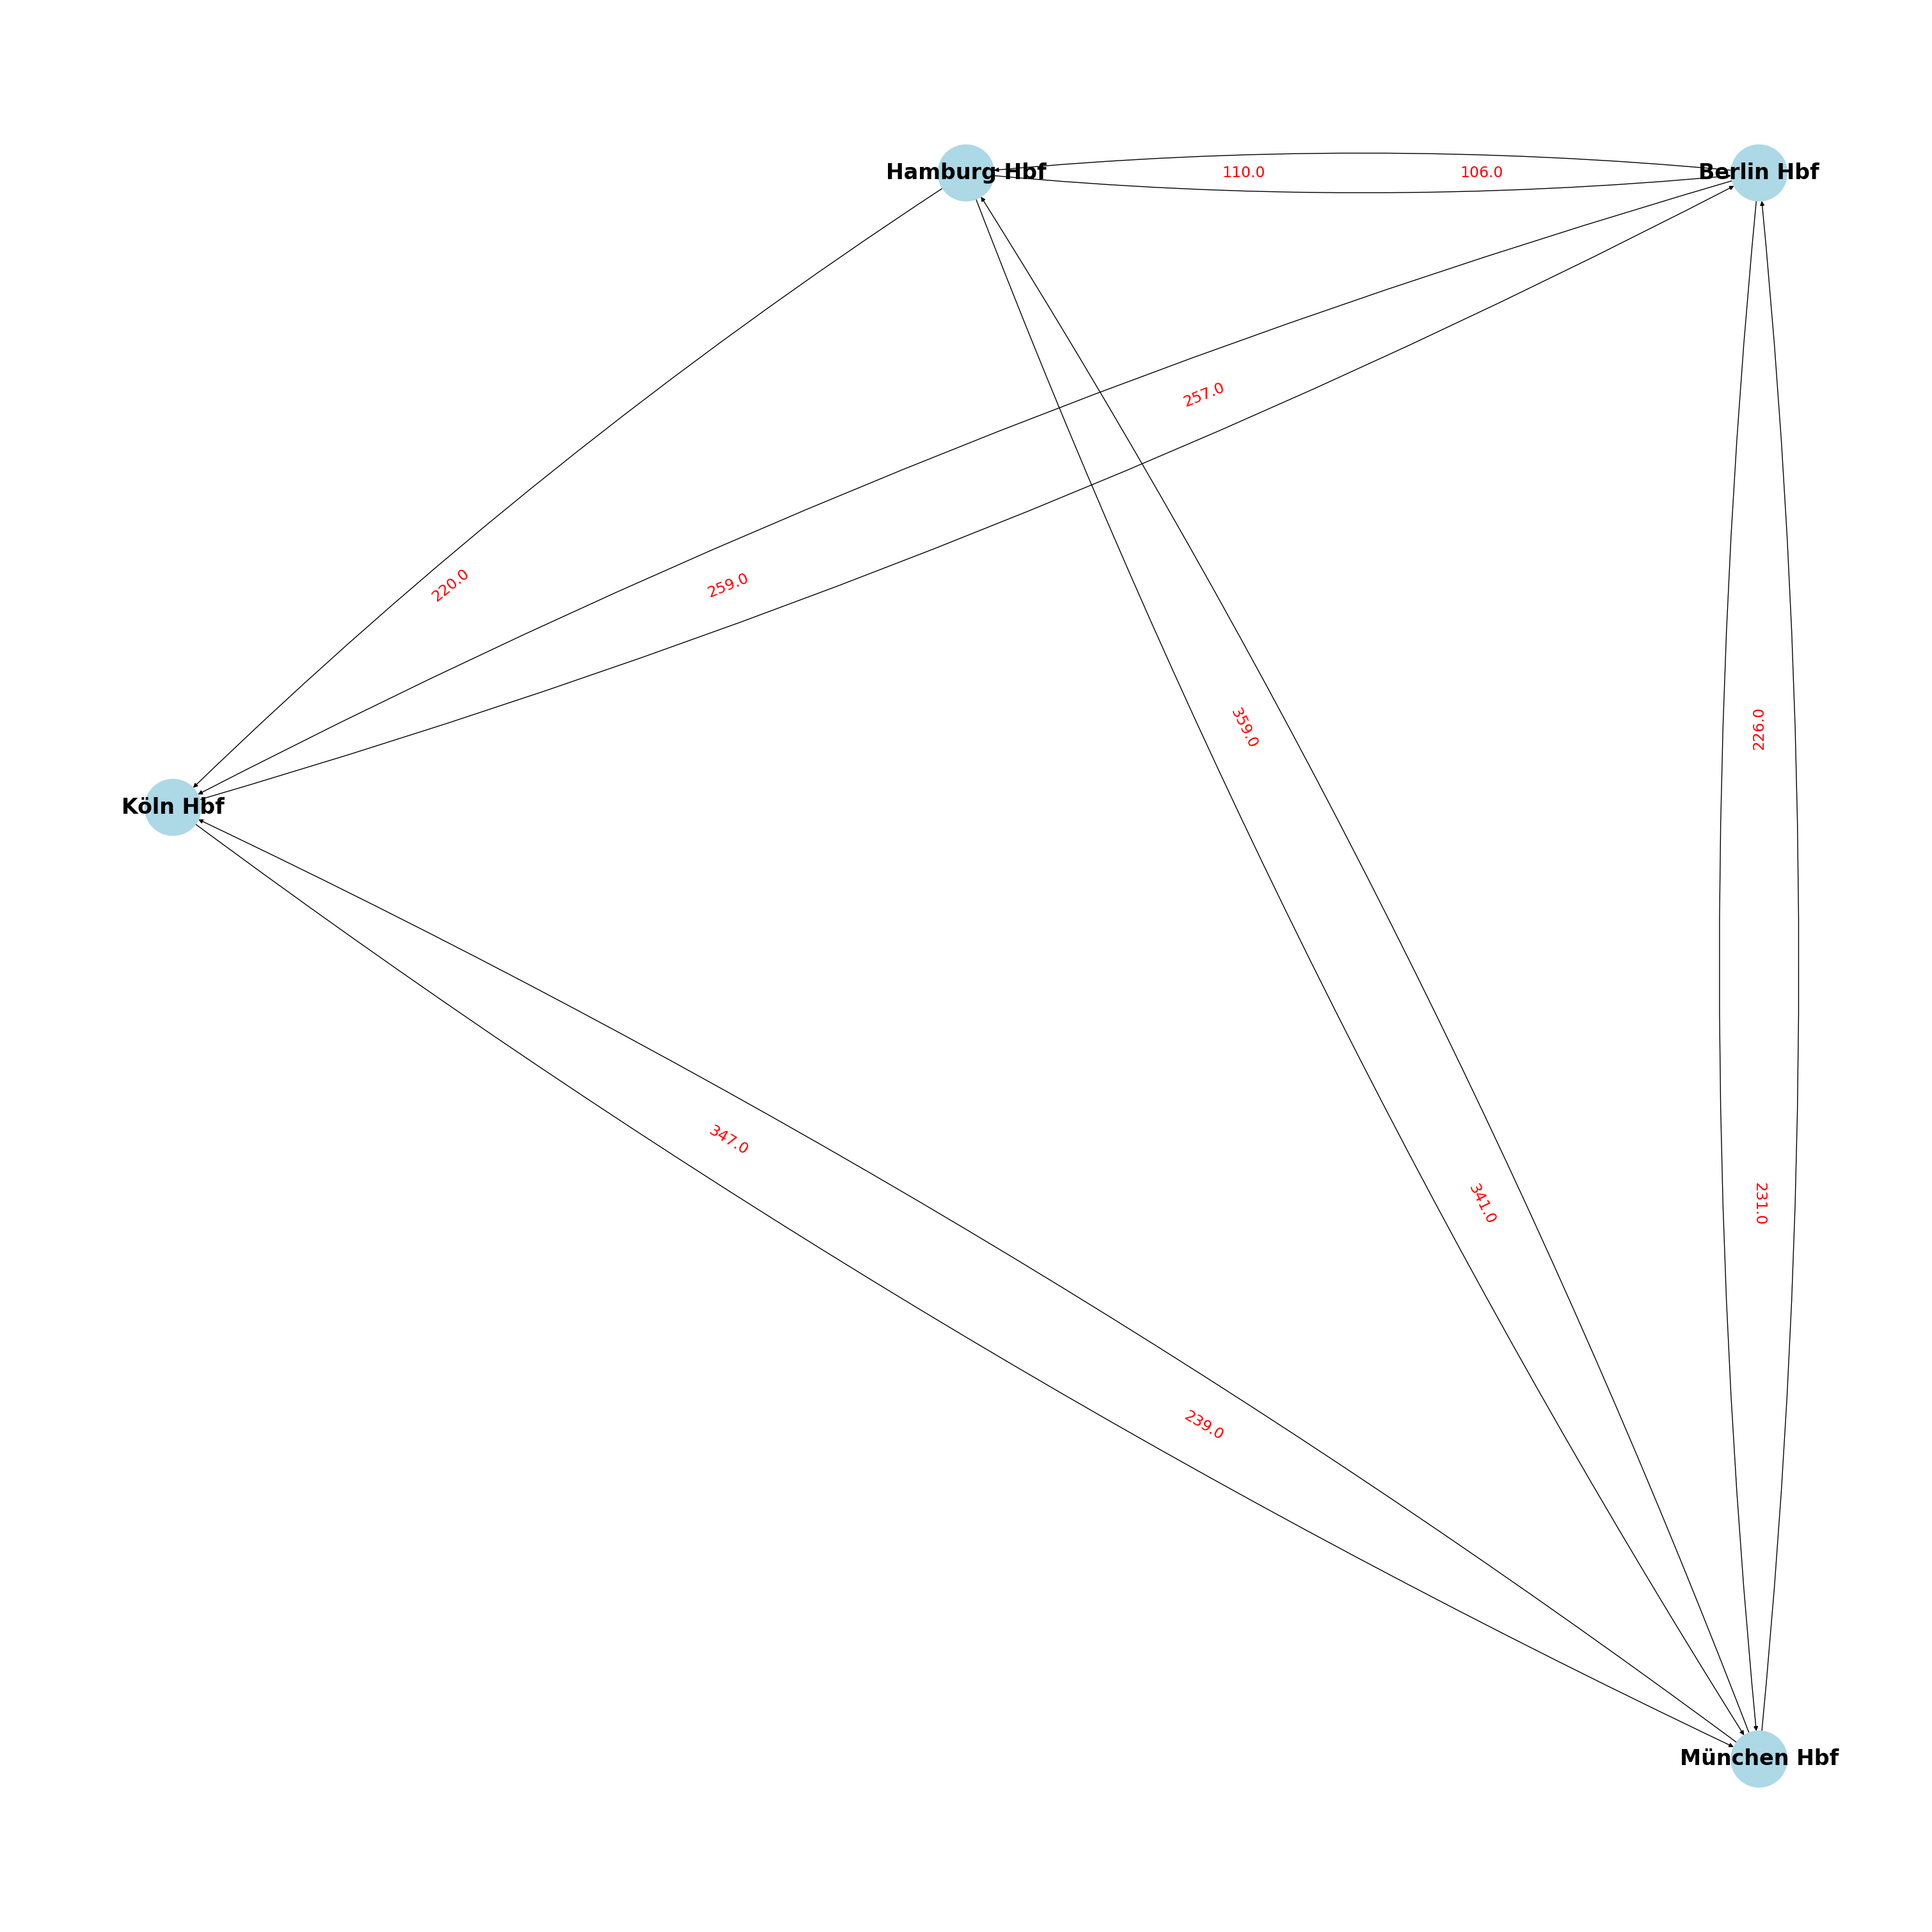

In [32]:
pos_4={
"Berlin Hbf":(1,1),
"Hamburg Hbf":(0.75,1),
"München Hbf":(1,0.75),
"Köln Hbf":(0.5,0.9)
}

data_4 = []
for sim in sim_4_data:
    duration_in_minutes = sim[2].total_seconds() / 60  # Konvertieren von timedelta in Minuten
    data_4.append((sim[0], sim[1], duration_in_minutes))  # Verwenden der Minuten

vis_4 = DirectedGraph(pos_4, data_4)
vis_4.show()


# Finaler Entwurf 


In [33]:
#Simulation des Bahnnetzes
edges = [
    ('Berlin', 'Schwerin'), ('Schwerin', 'Berlin'),
    ('Berlin', 'Hamburg'), ('Hamburg', 'Berlin'),
    ('Berlin', 'Rostock'), ('Rostock', 'Berlin'),
    ('Berlin', 'Magdeburg'), ('Magdeburg', 'Berlin'),
    ('Berlin', 'Leipzig'), ('Leipzig', 'Berlin'),
    ('Berlin', 'Dresden'), ('Dresden', 'Berlin'),
    ('Hamburg', 'Kiel'), ('Kiel', 'Hamburg'),
    ('Hamburg', 'Bremerhaven'), ('Bremerhaven', 'Hamburg'),
    ('Hamburg', 'Bremen'), ('Bremen', 'Hamburg'),
    ('Hamburg', 'Hannover'), ('Hannover', 'Hamburg'),
    ('Schwerin', 'Rostock'), ('Rostock', 'Schwerin'),
    ('Magdeburg', 'Hannover'), ('Hannover', 'Magdeburg'),
    ('Magdeburg', 'Leipzig'), ('Leipzig', 'Magdeburg'),
    ('Leipzig', 'Dresden'), ('Dresden', 'Leipzig'),
    ('Leipzig', 'Erfurt'), ('Erfurt', 'Leipzig'),
    ('Erfurt', 'Kassel'), ('Kassel', 'Erfurt'),
    ('Erfurt', 'Nürnberg'), ('Nürnberg', 'Erfurt'),
    ('Kassel', 'Hannover'), ('Hannover', 'Kassel'),
    ('Kassel', 'Frankfurt'), ('Frankfurt', 'Kassel'),
    ('Nürnberg', 'Würzburg'), ('Würzburg', 'Nürnberg'),
    ('Nürnberg', 'Regensburg'), ('Regensburg', 'Nürnberg'),
    ('Regensburg', 'München'), ('München', 'Regensburg'),
    ('München', 'Augsburg'), ('Augsburg', 'München'),
    ('Augsburg', 'Ulm'), ('Ulm', 'Augsburg'),
    ('Ulm', 'Stuttgart'), ('Stuttgart', 'Ulm'),
    ('Stuttgart', 'Mannheim'), ('Mannheim', 'Stuttgart'),
    ('Mannheim', 'Karlsruhe'), ('Karlsruhe', 'Mannheim'),
    ('Karlsruhe', 'Saarbrücken'), ('Saarbrücken', 'Karlsruhe'),
    ('Mannheim', 'Mainz'), ('Mainz', 'Mannheim'),
    ('Mainz', 'Koblenz'), ('Koblenz', 'Mainz'),
    ('Koblenz', 'Köln'), ('Köln', 'Koblenz'),
    ('Köln', 'Aachen'), ('Aachen', 'Köln'),
    ('Köln', 'Düsseldorf'), ('Düsseldorf', 'Köln'),
    ('Düsseldorf', 'Dortmund'), ('Dortmund', 'Düsseldorf'),
    ('Dortmund', 'Münster'), ('Münster', 'Dortmund'),
    ('Münster', 'Bremen'), ('Bremen', 'Münster'),
    ('Bremen', 'Bremerhaven'), ('Bremerhaven', 'Bremen'),
    ("Regensburg","Hof"),("Hof","Regensburg"),
    ("Köln","Dortmund"),("Dortmund","Köln"),
    ("Frankfurt(Main)","Würzburg"),("Würzburg","Frankfurt(Main)"),
    ("Frankfurt(Main)","Köln"),("Köln","Frankfurt(Main)"),
    ("Frankfurt(Main)","Mainz"),("Mainz","Frankfurt(Main)"),
    ("Frankfurt(Main)","Mannheim"),("Mannheim","Frankfurt(Main)"),
    ("Frankfurt(Main)","Kassel"),("Kassel","Frankfurt(Main)"),
    ("Karlsruhe","Freiburg(Breisgau)"),("Freiburg(Breisgau)","Karlsruhe"),
    ("Kassel","Dortmund"),("Dortmund","Kassel"),
    ("Münster(Westf)","Bremen"),("Bremen","Münster(Westf)"),
    ("Münster(Westf)","Hannover"),("Hannover","Münster(Westf)"),
    ("Münster(Westf)","Dortmund"),("Dortmund","Münster(Westf)"),
    ("Erfurt","Würzburg"),("Würzburg","Erfurt"),
    ("Hof","Nürnberg"),("Nürnberg","Hof"),
    ("Hof","Chemnitz"),("Chemnitz","Hof"),
    ("Chemnitz","Dresden"),("Dresden","Chemnitz"),
    ("Chemnitz","Leipzig"),("Leipzig","Chemnitz"),
    ("Chemnitz","Erfurt"),("Erfurt","Chemnitz"),
    ("Hamburg","Schwerin"),("Schwerin","Hamburg"),
    ("Nürnberg","München"),("München","Nürnberg"),
    ("Nürnberg","Augsburg"),("Augsburg","Nürnberg"),
    ("Mainz","Saarbrücken"),("Saarbrücken","Mainz"),
    ("Saarbrücken","Koblenz"),("Koblenz","Saarbrücken"),
    ("Saarbrücken","Mannheim"),("Mannheim","Saarbrücken"),
    ("Karlsruhe","Stuttgart"),("Stuttgart","Karlsruhe"),
    ("Hannover","Bremen"),("Bremen","Hannover"),
    ("Hannover","Dortmund"),("Dortmund","Hannover"),
    ("Lübeck","Hamburg"),("Hamburg","Lübeck"),
    ("Lübeck","Kiel"),("Kiel","Lübeck"),
    ("Lübeck","Schwerin"),("Schwerin","Lübeck")
        
]


In [34]:
# Ermittlung der wichtigen Bahnhof-IDs
city_stations_id = {}
edges_first = []
for edge in edges:
    edges_first.append(edge[0])

city_stations_id = get_station_ids(edges_first)
city_stations_id


{'Berlin Hbf': 8011160,
 'Schwerin Hbf': 8010324,
 'Hamburg Hbf': 8002549,
 'Rostock Hbf': 8010304,
 'Magdeburg Hbf': 8010224,
 'Leipzig Hbf': 8010205,
 'Dresden Hbf': 8010085,
 'Kiel Hbf': 8000199,
 'Bremerhaven Hbf': 8000051,
 'Bremen Hbf': 8000050,
 'Hannover Hbf': 8000152,
 'Erfurt Hbf': 8010101,
 'Kassel Hbf': 8000193,
 'Nürnberg Hbf': 8000284,
 'Frankfurt Hbf (tief)': 8098105,
 'Würzburg Hbf': 8000260,
 'Regensburg Hbf': 8000309,
 'München Hbf': 8000261,
 'Augsburg Hbf': 8000013,
 'Ulm Hbf': 8000170,
 'Stuttgart Hbf': 8000096,
 'Mannheim Hbf': 8000244,
 'Karlsruhe Hbf': 8000191,
 'Saarbrücken Hbf': 8000323,
 'Mainz Hbf': 8000240,
 'Koblenz Hbf': 8000206,
 'Köln Hbf': 8000207,
 'Aachen Hbf': 8000001,
 'Düsseldorf Hbf': 8000085,
 'Dortmund Hbf': 8000080,
 'Hof Hbf': 8002924,
 'Frankfurt(Main)Hbf': 8000105,
 'Freiburg(Breisgau) Hbf': 8000107,
 'Münster(Westf)Hbf': 8000263,
 'Chemnitz Hbf': 8010184,
 'Lübeck Hbf': 8000237}

## Gewinnung der Daten aus der API

In [35]:
'''
results = []
for from_city, to_city in edges:

    from_station = from_city + ' Hbf'
    to_station = to_city + ' Hbf'

    if from_city == "Münster(Westf)" or from_city == "Frankfurt(Main)":
        from_station = from_city + 'Hbf'

    if to_city == "Münster(Westf)" or to_city == "Frankfurt(Main)":
        to_station = to_city + 'Hbf'
        
    
    if from_station in city_stations_id and to_station in city_stations_id:
        from_id = city_stations_id[from_station]
        to_id = city_stations_id[to_station]
        info = get_info(from_id, to_id)
        if info:
            results.append(info)

results
'''
0

0

## Cachen
[13][14]

In [36]:
'''
# Filtering data where price is not 'unknown'
filtered_full_data = [
    {
        "start": start,
        "end": end,
        "duration": str(duration),
        "risk": risk,
        "price": price
    }
    for start, end, duration, risk, price in results if duration != 'unknown'
]

# Create JSON
full_json_data = json.dumps(filtered_full_data, indent=4)

# Save JSON to a file
full_json_file_path = 'graph_data.json'
with open(full_json_file_path, 'w') as file:
    file.write(full_json_data)

full_json_file_path
'''
0

0

In [37]:
full_json_file_path = 'graph_data.json'
with open(full_json_file_path, "r") as infile:
    tripDict = json.load(infile)

#print(tripDict)

## Erstellung des Bahnnetzes

In [38]:
from datetime import timedelta
# Funktion zur Umwandlung der Dauer von String zu timedelta
def parse_duration(duration_str):
    h, m, s = map(int, duration_str.split(':'))
    return timedelta(hours=h, minutes=m, seconds=s)

# JSON-Daten aus der Datei lesen
with open('graph_data.json', 'r') as file:
    data = json.load(file)

# Graphen initialisieren
graph = Graph()

# Daten zum Graphen hinzufügen
for entry in data:
    from_city = entry['start']
    to_city = entry['end']
    duration = parse_duration(entry['duration'])
    risk = entry['risk']
    cost = entry['price']
    
    graph.add_edge(from_city, to_city, duration, risk, cost)

#data

In [39]:
#Beispiel: Ausgabe aller Kanten von "Berlin Hbf"
graph.get_edges("Berlin Hbf")

[('Schwerin Hbf', (112.0, 'low-to-medium', 31.9)),
 ('Hamburg Hbf', (110.0, 'low-to-medium', 29.9)),
 ('Rostock Hbf', (157.0, 'unknown', 27)),
 ('Magdeburg Hbf', (106.0, 'unknown', 26.9)),
 ('Leipzig Hbf', (73.0, 'low-to-medium', 25.9)),
 ('Dresden Hbf', (121.0, 'high', 33.9))]

In [40]:
graph.get_edges("Frankfurt(Main)Hbf")

[('Würzburg Hbf', (71.0, 'low-to-medium', 25.9)),
 ('Köln Hbf', (166.0, 'unknown', 32.9)),
 ('Mainz Hbf', (34.0, 'unknown', 'unknown')),
 ('Mannheim Hbf', (38.0, 'very-high', 21.9)),
 ('Kassel Hbf', (96.0, 'high', 25.9))]

In [41]:
#edgecase
graph.get_edges("Freiburg(Breisgau) Hbf")

[('Karlsruhe Hbf', (65.0, 'low-to-medium', 17.9))]

In [42]:
'''
pos_n = {
    'Emden': (1, 8),
    'Bremen': (3, 8),
    'Bremerhaven': (3, 9),
    'Hamburg': (5, 9),
    'Kiel': (5, 11),
    'Schwerin': (7, 9),
    'Rostock': (8.5, 10),
    'Hannover': (5, 7),
    'Magdeburg': (7, 6.5),
    'Berlin': (9, 7),
    'Leipzig': (7, 5),
    'Dresden': (9, 4.5),
    'Erfurt': (6, 4),
    'Nürnberg': (6, 2.5),
    'Würzburg': (4, 2.5),
    'Frankfurt(Main)Hbf': (4, 4),
    'Kassel': (5, 5),
    'Mannheim': (2.5, 2.5),
    'Karlsruhe': (2, 1.5),
    'Stuttgart': (3, 1.5),
    'München': (6, 1),
    'Augsburg': (5, 1),
    'Regensburg': (7, 1.5),
    'Münster(Westf)Hbf': (2, 7),
    'Dortmund': (2, 6),
    'Düsseldorf': (2.5, 5),
    'Köln': (1, 4),
    'Koblenz': (1, 3),
    'Saarbrücken': (1, 2),
    'Mainz': (2.5, 3.5),
    'Chemnitz': (8, 4),
    'Freiburg(Breisgau)': (2, 0.5),
    'Konstanz': (3, 0),
    'Ulm': (4, 1),
    'Aachen': (0, 4),
    "Hof": (7, 3.5),
    "Lübeck":(6,10),
    'Frankfurt': (4, 4),
    'Münster': (2, 7),
    'Freiburg': (2, 0.5),

  }
'''
pos_n = pos_directed
pos_n['Freiburg(Breisgau)'] = (14, 3.5)


In [43]:

def simplify_name(name):
    return name.split(" Hbf")[0].split("(Main)")[0].split("(Westf)")[0].strip()


# Lesen der JSON-Datei
with open("graph_data.json", "r") as json_file:
    json_data = json.load(json_file)

# Speichern der Einträge in einer Liste von Tupeln
data=[]
for entry in json_data:
        data.append((simplify_name(entry["start"]), simplify_name(entry["end"]), parse_duration(entry["duration"]), entry["risk"], entry["price"]))

#data


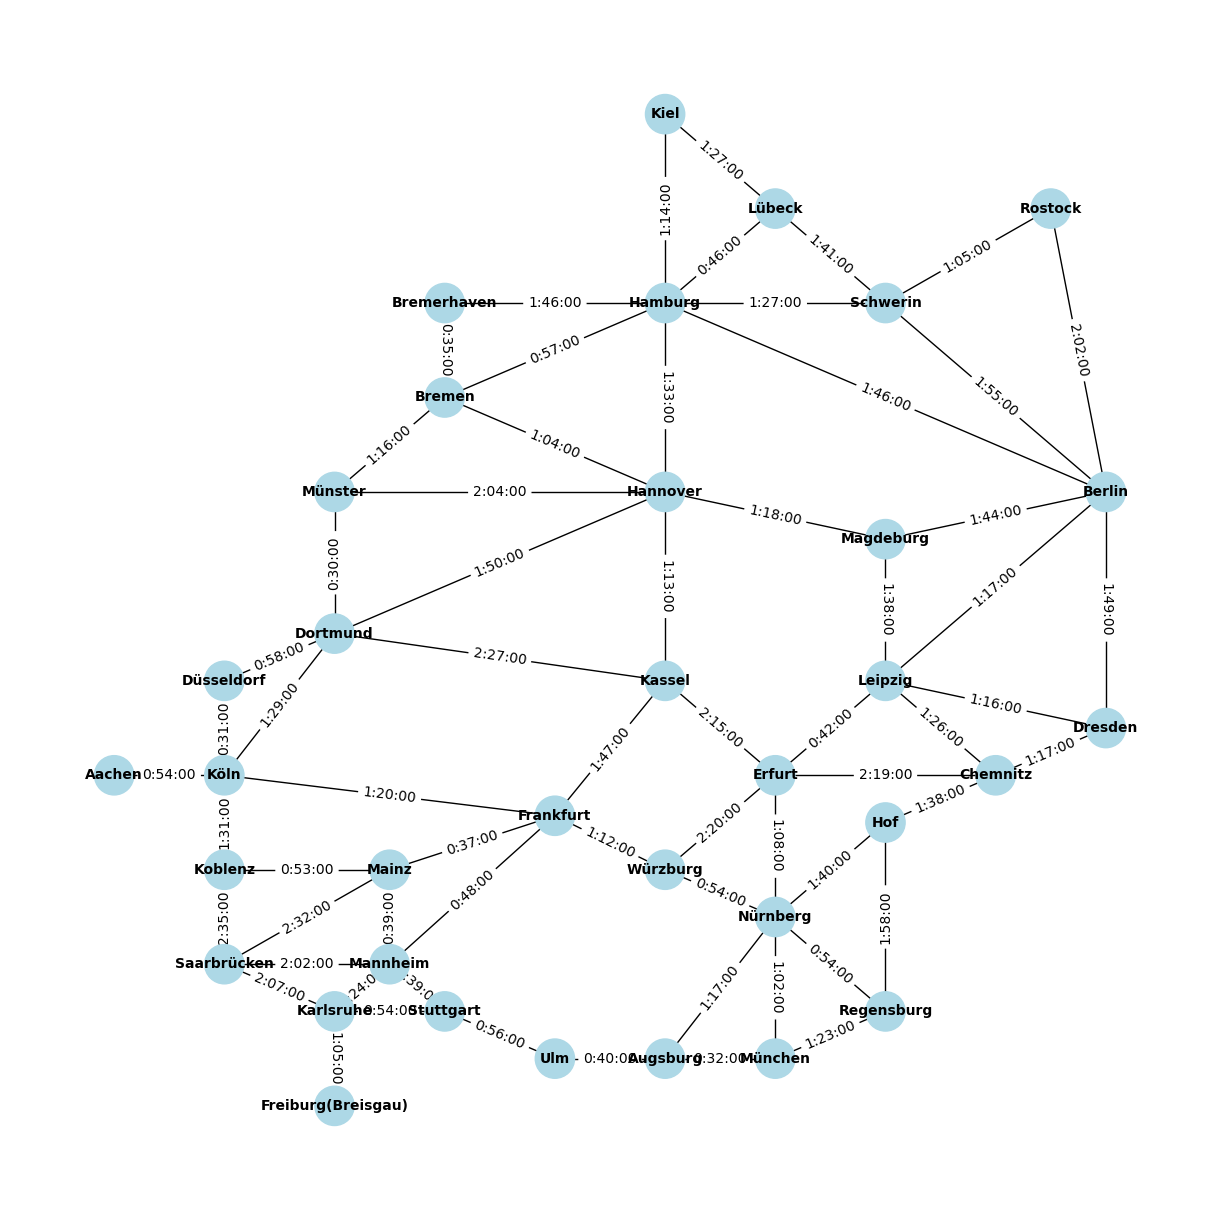

In [44]:
vis_n = Visualization(data, pos_n)
vis_n.draw()

# Aufgabe 3 - Anwendung von Dijkstra und A*


In [45]:
#import time
#from IPython.display import display, clear_output
#import matplotlib.pyplot as plt
#import networkx as nx

data_original=[]
with open('graph_data.json', 'r') as file:
    data = json.load(file)

for entry in data:
    from_city = entry['start']
    to_city = entry['end']
    duration = entry['duration']
    risk = entry['risk']
    cost = entry['price']
    
    data_original.append((from_city, to_city, duration, risk, cost))

#data_original 

In [46]:
#from datetime import timedelta

# Funktion zur Umwandlung der Dauer von String zu timedelta
def parse_duration(duration_str):
    hours, minutes, seconds = map(int, duration_str.split(':'))
    return hours * 60 + minutes + seconds / 60

def get_city_name(name):
    string = ''
    for symbol in name:
        if symbol == ' ' or symbol == '(':
            return string
        else:
            string += symbol
    return string
            
def get_all_edges(data):
    risk_map = {'low-to-medium' : 1, 'high': 2, 'very-high' : 3, 'unknown': 1}
    price = []
    duration = []
    risk = []
    for e in data:
        start = get_city_name(e[0])
        end = get_city_name(e[1])
        duration.append((start, end, parse_duration(e[2])))
        risk.append((start, end, risk_map.get(e[3])))
        if e[4] == "unknown":
            price.append((start, end, 19.9))
        else:    
            price.append((start, end, round(e[4],2)))
    return duration, risk, price


duration_edges, risk_edges, price_edges = get_all_edges(data_original)

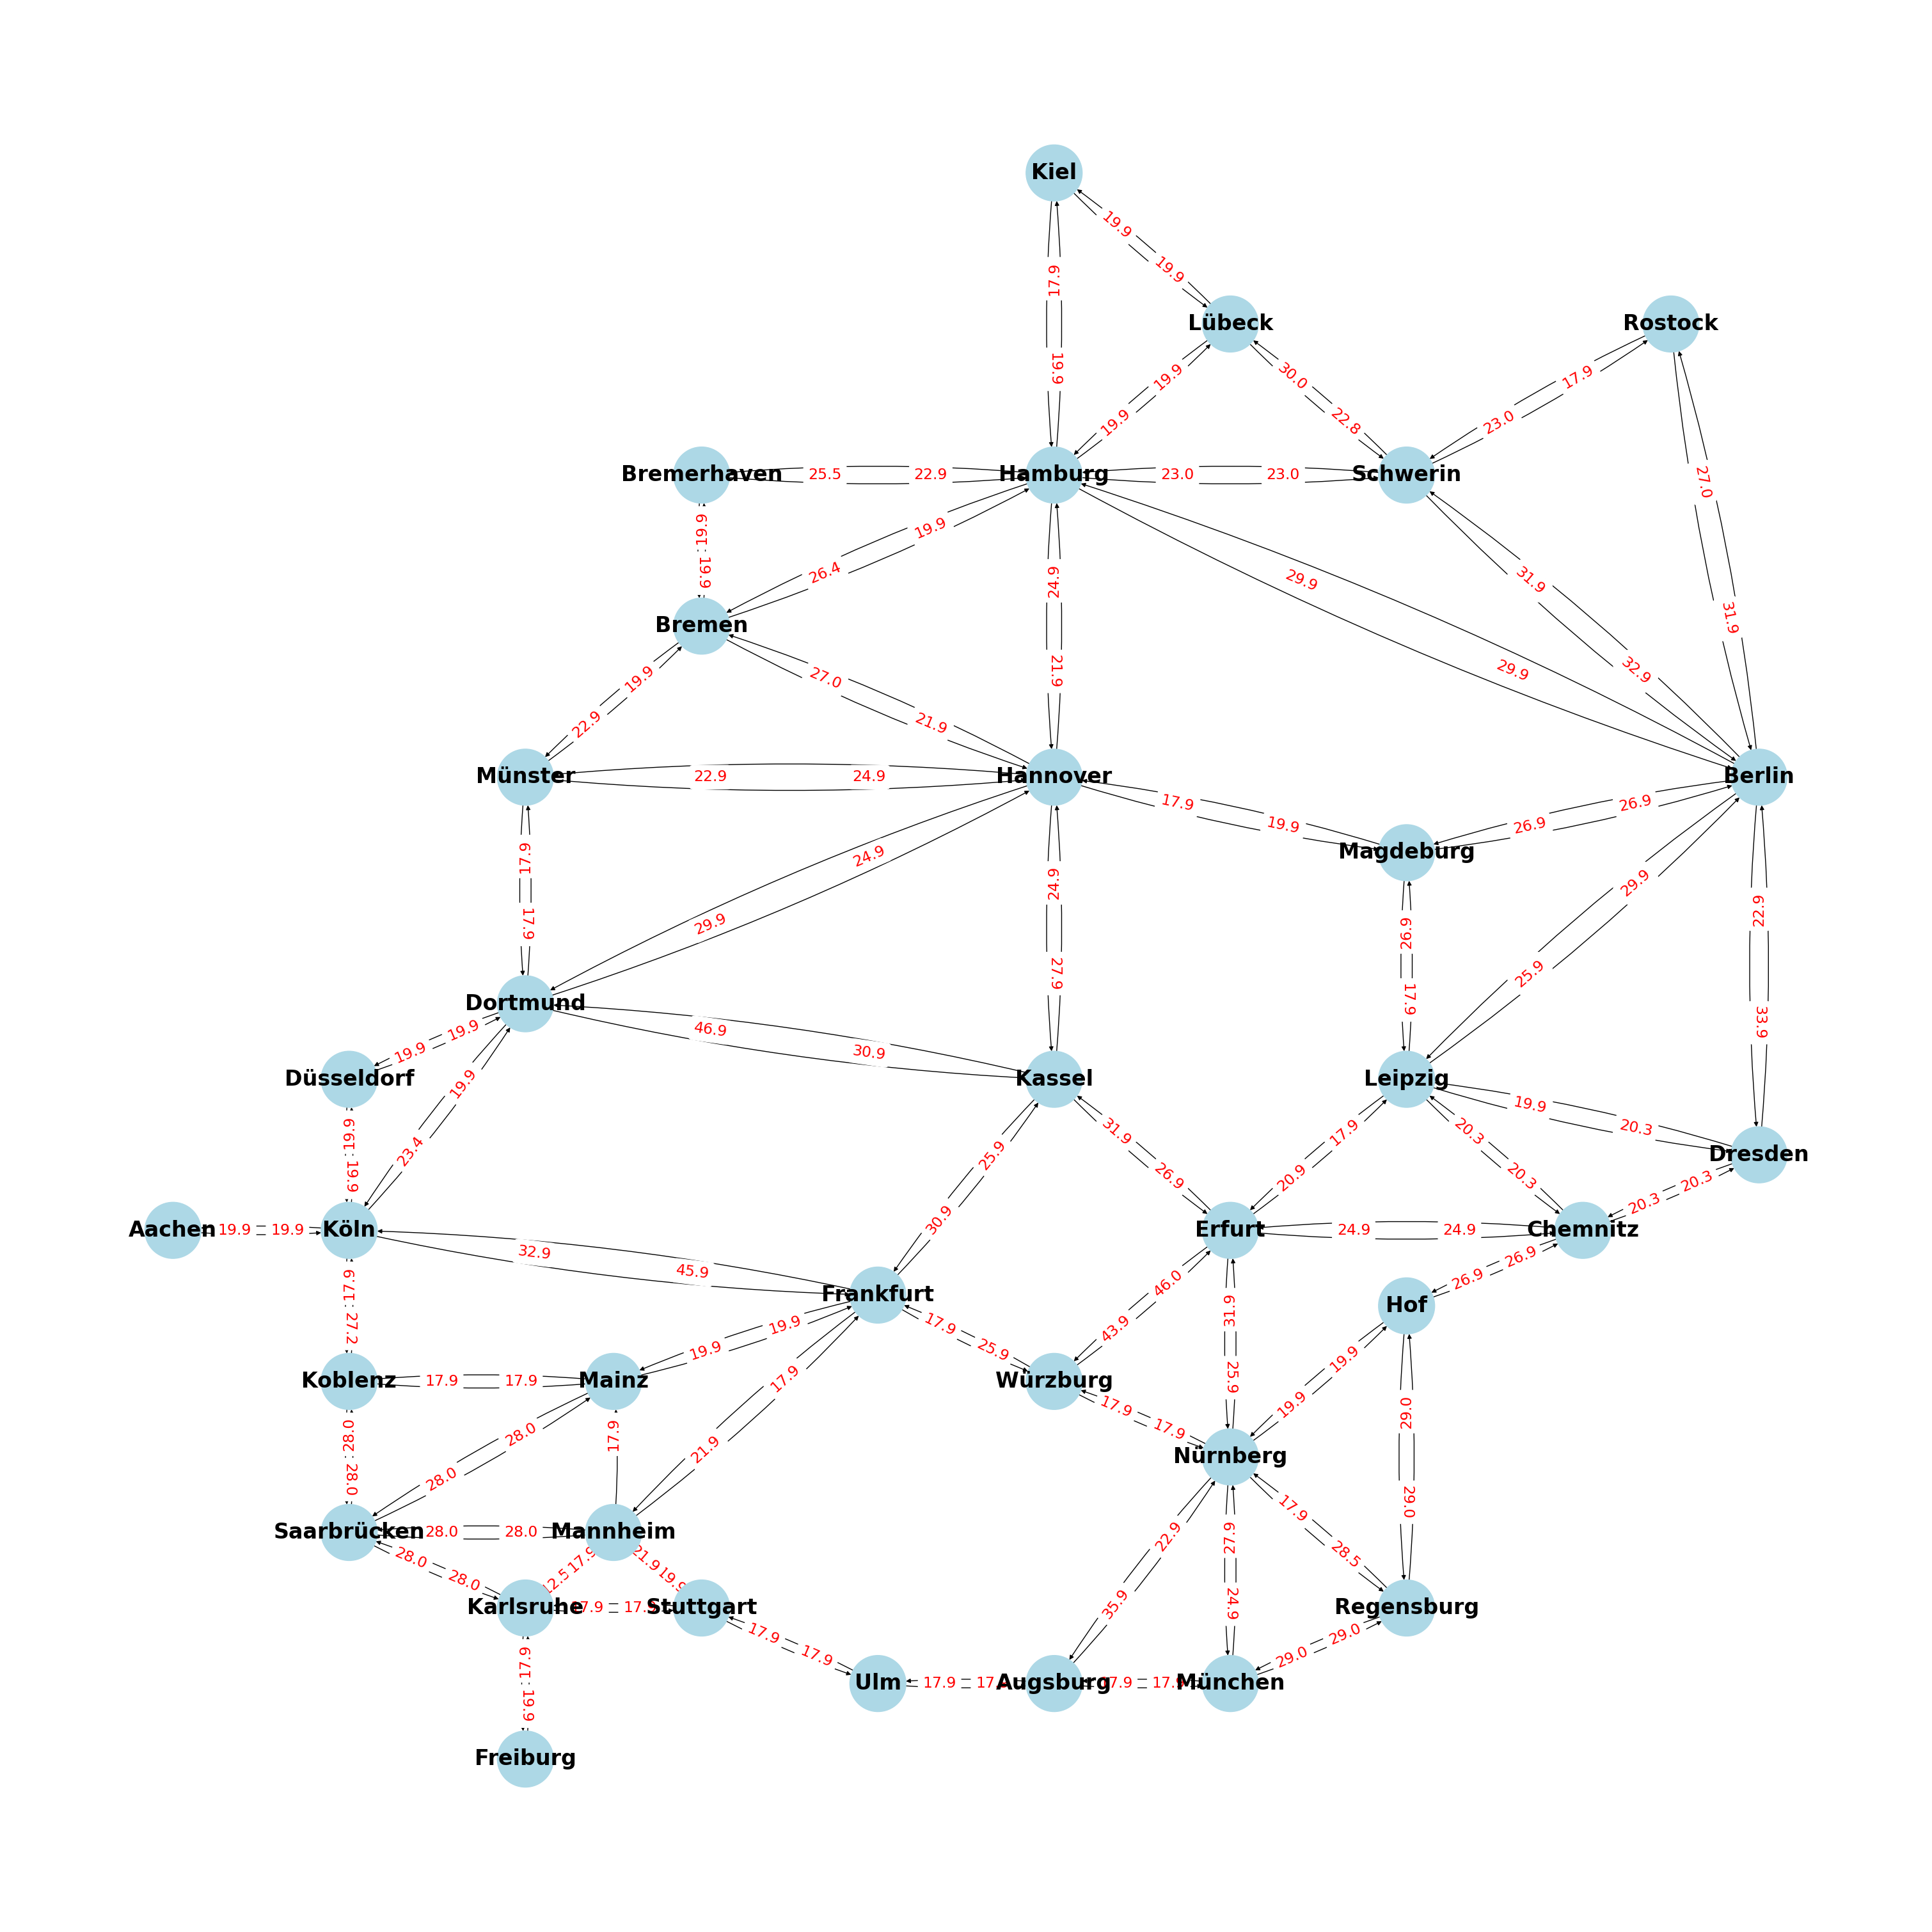

In [47]:
#del dient zur Verknüpfung von Aufgabe 2 und 3
del pos_n['Rosenheim']
del pos_n['Konstanz']
del pos_n['Freiburg(Breisgau)']
vis_real = DirectedGraph(pos_n, price_edges)
vis_real.show()

## Lösen der Aufgabenstellung mit Dijkstra

### Anwendung des Dijkstra Algorithmus auf der 'echten' Graphen 

### Rostock - Freiburg

In [48]:
dijkstra_price= Dijkstra(duration_edges, True, 'Rostock')

# Print the results
vis_cities, path, iterations, cost = dijkstra_price.efficient_path('Rostock', 'Freiburg')
#dijkstra_price.costs
#print(dijkstra_price.costs[16])

Best way to get from Rostock to Freiburg
The path: ['Rostock', 'Schwerin', 'Hamburg', 'Hannover', 'Kassel', 'Frankfurt', 'Mannheim', 'Karlsruhe', 'Freiburg']
Iterations: 35
Costs: 555


### Kiel - München

In [49]:
dijkstra_price= Dijkstra(duration_edges, True, 'Kiel')

# Print the results
vis_cities, path, iterations, cost = dijkstra_price.efficient_path('Kiel', 'München')
#dijkstra_price.costs
#print(dijkstra_price.costs[16])

Best way to get from Kiel to München
The path: ['Kiel', 'Hamburg', 'Berlin', 'Leipzig', 'Erfurt', 'Nürnberg', 'München']
Iterations: 29
Costs: 463


### Aachen - Dresden

In [50]:
dijkstra_price= Dijkstra(duration_edges, True, 'Aachen')

# Print the results
vis_cities, path, iterations, cost = dijkstra_price.efficient_path('Aachen', 'Dresden')
#dijkstra_price.costs
#print(dijkstra_price.costs[16])

Best way to get from Aachen to Dresden
The path: ['Aachen', 'Köln', 'Frankfurt', 'Würzburg', 'Erfurt', 'Leipzig', 'Dresden']
Iterations: 35
Costs: 490


# A* Algorithmus für Routenplanung

Der A* Algorithmus ist ein effizienter Pfadfindungsalgorithmus, der häufig in der Routenplanung verwendet wird. Dieser Algorithmus kombiniert die Vorteile von Dijkstra's Algorithmus und der Greedy Best-First-Suche, um den kürzesten Pfad von einem Startknoten zu einem Zielknoten zu finden.

## Grundprinzipien des A* Algorithmus[8][15][16]

Der A* Algorithmus verwendet zwei Hauptkostenfunktionen:
- $g(n)$: Die tatsächlichen Kosten vom Startknoten bis zum aktuellen Knoten $n$.
- $h(n)$: Die geschätzten Kosten vom aktuellen Knoten $n$ bis zum Zielknoten. Diese Funktion wird auch als Heuristik bezeichnet.

Die Gesamtkostenfunktion $f(n)$ ist definiert als:
$$ f(n) = g(n) + h(n) $$

Der Algorithmus wählt in jedem Schritt den Knoten mit den geringsten $f(n)$-Werten zur weiteren Expansion aus.

## Anpassungen für unseren Anwendungsfall

In unserem speziellen Fall haben wir einen Graphen, der Städte als Knoten und Bahnverbindungen zwischen diesen Städten als Kanten darstellt. Die Gewichte der Kanten können zwei verschiedene Werte haben:
1. **Preise in €**: Die Kosten der Bahnverbindung zwischen zwei Städten.
2. **Reisedauer in Minuten**: Die Zeit, die benötigt wird, um von einer Stadt zur anderen zu reisen.

Um die Heuristik realistischer zu gestalten, haben wir die tatsächlichen Luftlinien-Distanzen (Haversine-Distanzen) zwischen den Städten verwendet.

### Schritte der Anpassungen

1. **Berechnung der Haversine-Distanzen**:
   Die Haversine-Formel wird verwendet, um die Luftlinie zwischen zwei Punkten auf der Erdoberfläche zu berechnen. Die Haversine-Formel ist wie folgt definiert:

   $$ a = \sin^2\left(\frac{\Delta \phi}{2}\right) + \cos(\phi_1) \cdot \cos(\phi_2) \cdot \sin^2\left(\frac{\Delta \lambda}{2}\right) $$
   $$ c = 2 \cdot \text{atan2}\left(\sqrt{a}, \sqrt{1-a}\right) $$
   $$ d = R \cdot c $$

   Dabei ist:
   - $\phi_1, \phi_2$: die Breitengrade der beiden Punkte in Radiant
   - $\lambda_1, \lambda_2$: die Längengrade der beiden Punkte in Radiant
   - $\Delta \phi = \phi_2 - \phi_1$: die Differenz der Breitengrade
   - $\Delta \lambda = $\lambda_2 - $\lambda_1$: die Differenz der Längengrade
   - $R$: der Erdradius (ca. 6371 km)
   - $d$: die berechnete Entfernung zwischen den Punkten

2. **Ursprüngliche Adjazenzmatrix (Gewichtsmatrix)**:
   Diese Matrix enthält die Gewichte der Kanten zwischen den Städten. Sie kann sowohl die Preise als auch die Reisedauer darstellen.

   Beispiel einer Adjazenzmatrix:
   $$ A = \begin{bmatrix}
   0 & 3 & \cdots & 2 \\
   2 & 0 & \cdots & 3 \\
   \vdots & \vdots & \ddots & \vdots \\
   3 & 2 & \cdots & 0 \\
   \end{bmatrix} $$

   _Die Werte in den Matrizen sind beispielhaft gewählt._

3. **Luftlinien-Abstandsmatrix**:
   Diese Matrix enthält die Luftlinien-Distanzen zwischen den Städten.

   Beispiel einer Luftlinien-Abstandsmatrix:
   $$ L = \begin{bmatrix}
   0 & 5 & \cdots & 4 \\
   5 & 0 & \cdots & 6 \\
   \vdots & \vdots & \ddots & \vdots \\
   4 & 6 & \cdots & 0 \\
   \end{bmatrix} $$

   _Die Werte in den Matrizen sind beispielhaft gewählt._

4. **Verhältnis von Gewichten zu Luftlinien-Distanzen**:
   Da die tatsächlichen Gewichte (Preise oder Reisedauer) und die Luftlinien-Distanzen unterschiedlich skaliert sein können, berechnen wir das Verhältnis dieser beiden Größen, um die Heuristik anzupassen.

   Berechnet wird folgendes Verhältnis:
   $$ \text{ratio}_{ij} = \frac{\text{weight}_{ij}}{\text{airdistance}_{ij}} $$

   Also:
   $$ R_{ij} = \frac{A_{ij}}{L_{ij}} $$

   Beispiel einer Verhältnis-Matrix:
   $$ R = \begin{bmatrix}
   0 & 0.6 & \cdots & 0.5 \\
   0.4 & 0 & \cdots & 0.5 \\
   \vdots & \vdots & \ddots & \vdots \\
   0.3 & 0.5 & \cdots & 0 \\
   \end{bmatrix} $$



5. **Delta-Potenzial-Matrix**:
   Diese Matrix gibt die Differenz der Heuristikwerte zwischen den Knoten an.

   Berechnet wird folgendes:

   $$ \Delta P_{ij} = h(j) - h(i) $$

   Beispiel einer Delta-Potenzial-Matrix:
   $$ \Delta P = \begin{bmatrix}
   0 & 2 & \cdots & -1 \\
   -2 & 0 & \cdots & 1 \\
   \vdots & \vdots & \ddots & \vdots \\
   1 & -1 & \cdots & 0 \\
   \end{bmatrix} $$

   _Die Werte in den Matrizen sind beispielhaft gewählt._

6. **Anpassung der Adjazenzmatrix**:
   Schließlich passen wir die Adjazenzmatrix der Gewichte mit der Delta-Potenzial-Matrix und den Verhältniswerten an, um die Heuristik korrekt zu skalieren.

   Berechnet wird folgendes:
   $$ \text{adjusted-matrix}_{ij} = \text{weight}_{ij} + (\Delta P_{ij} \cdot \text{ratio}_{ij}) $$

   Also:
   $$ G_{ij} = A_{ij} + (\Delta P_{ij} \cdot R_{ij}) $$

   Beispiel einer angepassten Adjazenzmatrix:
   $$ G = \begin{bmatrix}
   0 & 3.6 & \cdots & 1.5 \\
   1.2 & 0 & \cdots & 3.5 \\
   \vdots & \vdots & \ddots & \vdots \\
   3.3 & 1.5 & \cdots & 0 \\
   \end{bmatrix} $$



7. **Anpassung der Matrix mit Minimalwerten**:
   Um sicherzustellen, dass keine negativen Werte in der finalen Matrix auftreten, wird der Minimalwert der adjustierten Matrix und eine sehr geringe Konstante $c$ (im Beispiel: $ c = 0.01$) zu den nicht null Werten hinzugefügt:

   Berechnet wird folgendes:
   $$ \text{final-matrix}_{ij} = \text{adjusted-matrix}_{ij} + \min(\text{adjusted-matrix}) + c, \text{für } G_{ij} \neq 0  $$

   Also:
   $$
        F_{ij} = \begin{cases}
        G_{ij} + \min(G) + c, & \text{wenn } G_{ij} \neq 0 \\
        0, & \text{wenn } G_{ij} = 0
        \end{cases}
        $$


   Beispiel einer finalen Matrix:
   $$ F = \begin{bmatrix}
   0 & 3.61 & \cdots & 1.51 \\
   1.21 & 0 & \cdots & 3.51 \\
   \vdots & \vdots & \ddots & \vdots \\
   3.31 & 1.51 & \cdots & 0 \\
   \end{bmatrix} $$



## Fazit

Der A* Algorithmus ist ein leistungsfähiges Werkzeug zur Pfadfindung, das durch die Anpassung der Heuristik an die realen Distanzen und Gewichte weiter optimiert werden kann. Diese Anpassungen sorgen dafür, dass der Algorithmus effizient und genau arbeitet, indem er die realen Bedingungen besser berücksichtigt. Ob die Gewichte die Kosten oder die Reisedauer darstellen, der Algorithmus passt sich entsprechend an und liefert optimale Ergebnisse.

#### Luftkoordinaten für die Heuristik[17]



In [51]:
# Luftkoordinaten für die Heuristik
real_coordinates = {
        'Bremen': (53.079, 8.801),
        'Bremerhaven': (53.551, 8.580),
        'Hamburg': (53.551, 9.993),
        'Kiel': (54.323, 10.122),
        'Schwerin': (53.629, 11.413),
        'Rostock': (54.092, 12.099),
        'Hannover': (52.375, 9.732),
        'Magdeburg': (52.131, 11.639),
        'Berlin': (52.520, 13.405),
        'Leipzig': (51.339, 12.373),
        'Dresden': (51.050, 13.738),
        'Erfurt': (50.984, 11.029),
        'Nürnberg': (49.452, 11.076),
        'Würzburg': (49.791, 9.953),
        'Frankfurt': (50.110, 8.682),
        'Kassel': (51.315, 9.498),
        'Mannheim': (49.487, 8.466),
        'Karlsruhe': (49.006, 8.403),
        'Stuttgart': (48.783, 9.183),
        'München': (48.135, 11.582),
        'Augsburg': (48.371, 10.898),
        'Regensburg': (49.013, 12.101),
        'Münster': (51.961, 7.626),
        'Dortmund': (51.513, 7.465),
        'Düsseldorf': (51.227, 6.773),
        'Köln': (50.937, 6.960),
        'Koblenz': (50.356, 7.599),
        'Saarbrücken': (49.240, 6.996),
        'Mainz': (49.993, 8.247),
        'Chemnitz': (50.832, 12.925),
        'Freiburg': (47.999, 7.842),
        'Konstanz': (47.659, 9.175),
        'Lindau': (47.548, 9.684),
        'Ulm': (48.401, 9.987),
        'Aachen': (50.776, 6.083),
        'Lübeck': (53.8655, 10.6866),
        'Hof': (50.3139, 11.9123),
        'Rosenheim': (47.8561, 12.1289)
}

#### Haversine-Formel um den Abstand zwischen den Städten zu berechnen

In [52]:
# Working version
import numpy as np
import networkx as nx
import math

class AStar:
    def __init__(self, start_city, end_city, edges, coords=real_coordinates):
        self.G_nx = nx.DiGraph()
        self.G_nx.add_nodes_from(coords.keys())
        self.G_nx.add_weighted_edges_from(edges)
        #self.G_nx = G
        self.node_to_index = {node: idx for idx, node in enumerate(self.G_nx.nodes())}
        self.index_to_node = {idx: node for idx, node in enumerate(self.G_nx.nodes())}
        self.start = self.city(start_city)
        self.end = self.city(end_city)     
        A = nx.adjacency_matrix(self.G_nx, weight='weight')
        self.A_matrix = A.toarray()
        self.length = len(self.A_matrix[0])
        self.real_coordinates = coords
        
        # Berechnung der Potenziale und Distanzen
        self.real_distances = self.get_potentials()
        self.delta_potential_matrix = self.get_delta_distance_matrix(self.real_distances)
        self.cities_distances_matrix = self.get_cities_airdistances_matrix()

        # # Berechnet das Verhältnis von Gewichten zu Luftlinien-Distanzen und passt an die Ursprungtsmatrix an
        self.ratio_matrix = self.get_weight_airdistance_ratio(self.A_matrix, self.cities_distances_matrix)
        self.ratio_adjusted_matrix = self.adjust_matrix_with_ratio(self.A_matrix, self.ratio_matrix, self.delta_potential_matrix)
        self.final_ratio_matrix = self.adjust_matrix_with_min(self.ratio_adjusted_matrix)

        # Ausführung des Algorithmus und Wegbestimmung
        self.costs, self.prevs, self.iterations, self.visited = self.a_star(self.start, self.end)
        self.visited_cities = self.translate_chain(self.visited)
        self.chain = self.get_chain(self.prevs)
        self.path = self.translate_chain(self.chain)
              
            
        # Konvertiert einen Stadtnamen in seinen Index
    def city(self, city): 
        return self.node_to_index.get(city)
    
    # Konvertiert einen Index in den Stadtnamen
    def index(self, index): 
        return self.index_to_node.get(index)
    
    # Berechnet die Haversine-Distanz zwischen zwei Städten
    def haversine(self, city1, city2):
        coord1 = self.real_coordinates[self.index(city1)]
        coord2 = self.real_coordinates[self.index(city2)]
        # Koordinaten in Bogenmaß umwandeln
        lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
        lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])
        # Haversine-Formel
        dlat = lat2 - lat1
        dlon = lon2 - lon1
        a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        # Radius der Erde in Kilometern
        R = 6371
        distance = R * c
        return distance
    
     # Gibt die Potenziale (Heuristiken) der Städte zurück
    def get_potentials(self):
        return [self.haversine(i, self.end) for i in range(self.length)]  
    
    #  Berechnet die Delta-Potenzial-Matrix
    def get_delta_distance_matrix(self, distance_arr):
        new_arr = np.zeros((self.length, self.length))
        for i in range(self.length):
            for j in range(self.length):
                if self.A_matrix[i][j] != 0:
                    new_arr[i][j] = - distance_arr[i] + distance_arr[j] #distance_arr[i] - distance_arr[j]
        return new_arr
    
    # Berechnet die Luftlinien-Distanzen zwischen den Städten
    def get_cities_airdistances_matrix(self):
        new_arr = np.zeros((self.length, self.length))
        for i in range(self.length):
            for j in range(self.length):
                if self.A_matrix[i][j] != 0:
                    new_arr[i][j] = self.haversine(i, j)
        return new_arr
    
    # Berechnet das Verhältnis von Gewichten zu Luftlinien-Distanzen
    def get_weight_airdistance_ratio(self, weight_matrix, airdistance_matrix):
        new_arr = np.zeros((self.length, self.length))
        for i in range(self.length):
            for j in range(self.length):
                if weight_matrix[i][j] != 0:
                    new_arr[i][j] = weight_matrix[i][j] / airdistance_matrix[i][j]
        return new_arr
    
    # Passt die Matrix basierend auf dem Verhältnis an
    def adjust_matrix_with_ratio(self, weight_matrix, ratio_matrix, delta_potential_matrix):
        new_arr = np.zeros((self.length, self.length))
        for i in range(self.length):
            for j in range(self.length):
                if weight_matrix[i][j] != 0:
                    new_arr[i][j] = weight_matrix[i][j] + delta_potential_matrix[i][j] * ratio_matrix[i][j]
        return new_arr
    
    # Gibt das Minimum in einer Matrix zurück
    def get_min(self, matrix):
        min_value = float('inf')
        for row in matrix:
            for value in row:
                if value != 0 and value < min_value:
                    min_value = value
        return min_value if min_value != float('inf') else None
    
    # Passt die Matrix mit dem Minimumswert an
    def adjust_matrix_with_min(self, adj_matrix):
        min_value = self.get_min(adj_matrix)
        if min_value > 0:
            min_value = 0.001
        else:
            min_value = abs(min_value) + 0.001
        arr = np.zeros((self.length, self.length))
        for i in range(self.length):
            for j in range(self.length):
                if self.A_matrix[i][j] != 0:
                    arr[i][j] = adj_matrix[i][j] + min_value
        return arr
    
    # Gibt die Nachfolger eines Knotens zurück, die noch nicht besucht wurden
    def get_succesors(self, index, visited, matrix):
        arr = []
        for i in range(self.length):
            if matrix[index][i] != 0 and i not in visited:
                arr.append(i)
        return arr
        
    # Initialisiert die Startkosten für den A* Algorithmus
    def initialize_start(self, index):
        arr = []
        for i in range(self.length):
            if i == index:
                arr.append(0)
            else:
                arr.append(Infinity)
        return arr

    # Aktualisiert die Kosten der Nachfolgerknoten
    def actualize_costs(self, index, costs, prevs, succesors, matrix):
        self_cost = costs[index]
        for i in range(self.length):
            new_cost = matrix[index][i] + self_cost
            if new_cost < costs[i] and i in succesors:
                costs[i] = new_cost
                prevs[i] = index
        return costs, prevs              
    
    # Führt den A* Algorithmus aus
    def a_star(self, start, target):
        # used_matrix = self.final_matrix
        used_matrix = self.final_ratio_matrix
        queue = [start]
        visited = []
        costs = self.initialize_start(start)
        prevs = [-1 for _ in range(self.length)] # -1 stands for None
        counter = 0
        while queue:
            if len(queue) == 0:
                    break
            e = queue[0]
#             print(f'{self.index(e):<11} {costs[e]}')
            #print(f'{self.translate_chain(queue)}\n{costs}')
            if e in visited:
                continue
            counter += 1
            current_succesors = self.get_succesors(e, visited, used_matrix)
            #if target in queue:
            
            if target == e: # ends when reaches the target
                return costs, prevs, counter, visited
            costs, prevs = self.actualize_costs(e, costs, prevs, current_succesors, used_matrix)
            visited.append(e)
            queue.extend(current_succesors)
            queue = self.clear_queue(queue, visited)
            queue = self.sort_queue(queue, costs)    
        return costs, prevs, counter, visited
    
    # Sortiert die Warteschlange nach Kosten
    def sort_queue(self, queue, costs):
        arr = [(e, costs[e]) for e in queue] # create array of tuples of cities and costs
        sorted_indexed_arr = sorted(arr, key=lambda x: x[1]) # sorting according to the cost
        return [index for index, element in sorted_indexed_arr] # Extract the indices from the sorted list of tuples
    
    # Entfernt besuchte Knoten aus der Warteschlange
    def clear_queue(self, queue, visited):
        new_queue = []
        for e in queue:
            if e not in visited:
                new_queue.append(e)
        return new_queue
    
      # Gibt den numerischen Pfad zurück
    def get_chain(self, prevs):
        arr = [self.end]
        curr = self.end
        for i in range(self.length):
            prev = prevs[curr]
            if prev == -1:
                break
            else:
                arr.append(prev)
            curr = prev
        arr.reverse()
        return arr
    
    # Übersetzt den numerischen Pfad in Stadtnamen
    def translate_chain(self, chain):
        arr = []
        for e in chain:
            arr.append(self.index(e))
        return arr
    
    # Gibt den effizientesten Pfad und die Kosten aus
    def efficient_path(self):
        path = self.path
        print(f'Der beste Weg von {self.index(self.start)} nach {self.index(self.end)}:\nStrecke: {path}\nIterationen: {self.iterations}')
        print(f'Reisedauer in Minuten: {self.get_real_cost(self.chain)}')
        
    # Berechnet die tatsächlichen Kosten (von der ursprünglichen Matrix)
    def get_real_cost(self, chain):
        #chain = self.get_chain(self.prevs)
        res = 0
        curr = self.start
        for i in range(len(chain)-1):
            e = chain[i]
            n_e = chain[i+1]
            res += self.A_matrix[e][n_e]
        return res
            
    
a = AStar('München', 'Hamburg', duration_edges)
a.efficient_path()

Der beste Weg von München nach Hamburg:
Strecke: ['München', 'Nürnberg', 'Erfurt', 'Kassel', 'Hannover', 'Hamburg']
Iterationen: 14
Reisedauer in Minuten: 408


## Lösen der Aufgabenstellung mit A*
### Rostock - Freiburg

In [53]:
strecke_R_F = AStar('Rostock', 'Freiburg', duration_edges)
strecke_R_F.efficient_path()
len(strecke_R_F.visited)

Der beste Weg von Rostock nach Freiburg:
Strecke: ['Rostock', 'Schwerin', 'Hamburg', 'Hannover', 'Kassel', 'Frankfurt', 'Mannheim', 'Karlsruhe', 'Freiburg']
Iterationen: 9
Reisedauer in Minuten: 555


8

In [54]:
vis_ap = DirectedGraph(pos_directed, duration_edges)
#vis_ap.show_spread(strecke_R_F.visited_cities, strecke_R_F.path)

### Kiel - München

In [55]:
strecke_K_M = AStar('Kiel', 'München', duration_edges)
strecke_K_M.efficient_path()
len(strecke_K_M.visited)

Der beste Weg von Kiel nach München:
Strecke: ['Kiel', 'Hamburg', 'Hannover', 'Kassel', 'Erfurt', 'Nürnberg', 'München']
Iterationen: 15
Reisedauer in Minuten: 510


14

In [56]:
vis_ap = DirectedGraph(pos_directed, duration_edges)
#vis_ap.show_spread(strecke_K_M.visited_cities, strecke_K_M.path)

### Aachen - Dresden

In [57]:
strecke_A_D = AStar('Aachen', 'Dresden', duration_edges)
strecke_A_D.efficient_path()
len(strecke_A_D.visited)

Der beste Weg von Aachen nach Dresden:
Strecke: ['Aachen', 'Köln', 'Dortmund', 'Kassel', 'Erfurt', 'Leipzig', 'Dresden']
Iterationen: 10
Reisedauer in Minuten: 551


9

In [58]:
vis_ap = DirectedGraph(pos_directed, duration_edges)
#vis_ap.show_spread(strecke_A_D.visited_cities, strecke_A_D.path)

# Auswerungstabelle Dijkstra vs A*

| Verbindung               | Algorithmus | Reisedauer | Iterationen  |  
|--------------------------|-------------|------------|---------|
| Rostock nach Freiburg    | Dijkstra    | 555 min    | 35      | 
|                          | A*          | 555 min    | 9       | 
| Kiel nach München        | Dijkstra    | 463 min    | 29      | 
|                          | A*          | 510 min    | 15      | 
| Aachen nach Dresden      | Dijkstra    | 490 min    | 35      | 
|                          | A*          | 551 min    | 10      | 

## Fazit

Die Ergebnisse verdeutlichen folgende Punkte:

1. **Reisedauer**:
   - Der Dijkstra-Algorithmus bietet für zwei Verbindungen kürzere Reisedauern im Vergleich zu A*.
   - Beispiel: Für die Strecke Kiel nach München beträgt die Reisedauer mit Dijkstra 463 Minuten, während sie mit A* 510 Minuten beträgt.

2. **Effizienz (Iterationen und Knotenbesuche)**:
   - Der A*-Algorithmus benötigt deutlich weniger Iterationen und besucht weniger Knoten als Dijkstra.
   - Beispiel: Für die Strecke Rostock nach Freiburg benötigt A* nur 9 Iterationen und besucht 8 Knoten, während Dijkstra 35 Iterationen benötigt und 34 Knoten besucht.
   - Diese Effizienzsteigerung zeigt sich auch bei den anderen Verbindungen.

3. **Gesamtbewertung**:
   - Dijkstra liefert zwar die optimaleren (kürzeren) Wege, ist jedoch in Bezug auf die Anzahl der Iterationen und besuchten Knoten weniger effizient.
   - A* ist effizienter in der Verarbeitung, benötigt jedoch längere Reisedauern.

### Schlussfolgerung

Die Wahl des Algorithmus hängt von den Prioritäten ab:
- Wenn die kürzeste Reisedauer entscheidend ist, ist der Dijkstra-Algorithmus die bessere Wahl.
- Wenn Rechenzeit und Effizienz wichtiger sind, ist der A*-Algorithmus vorzuziehen.

Diese Ergebnisse unterstreichen die Bedeutung der Algorithmuswahl je nach Anwendungsszenario im Bahnverkehr.

# Aufgabe 4 - Tool zur Interaktion

Da die Komplexität unseres Graphen mit nur 36 Knoten relativ gering ist, ist die erhöhte Effizienz des A*-Algorithmus praktisch vernachlässigbar. Im Gegenzug bietet der Dijkstra-Algorithmus einen präziseren und optimaleren Weg, da er alle Knoten im Graphen berücksichtigt. Der A*-Algorithmus hingegen folgt aufgrund seiner Heuristik dem vermeintlich kürzesten Pfad und könnte dabei alternative, kostengünstigere Wege (sowohl in Bezug auf Zeit als auch Preis) außer Acht lassen.

## Beispiel: Prag - Rom

Das folgende Bild verdeutlicht den Unterschied in der Anzahl der besuchten Knoten zwischen dem Dijkstra-Algorithmus und dem A*-Algorithmus bei größeren Graphen. Während Dijkstra etwa 200.000 Knoten besucht, reduziert sich die Anzahl der Knoten beim A*-Algorithmus auf etwa 47.000, was die Effizienzsteigerung deutlich zeigt. Bei unserem kleineren Graphen ist dieser Unterschied jedoch weniger relevant.


Dieses Beispiel zeigt, dass die Effizienzsteigerung des A*-Algorithmus besonders bei großen und komplexen Graphen von Vorteil ist. Bei kleineren Graphen, wie in unserem Fall mit nur 36 Knoten, ist der Dijkstra-Algorithmus aufgrund seiner umfassenden Suche nach dem optimalen Weg vorzuziehen.


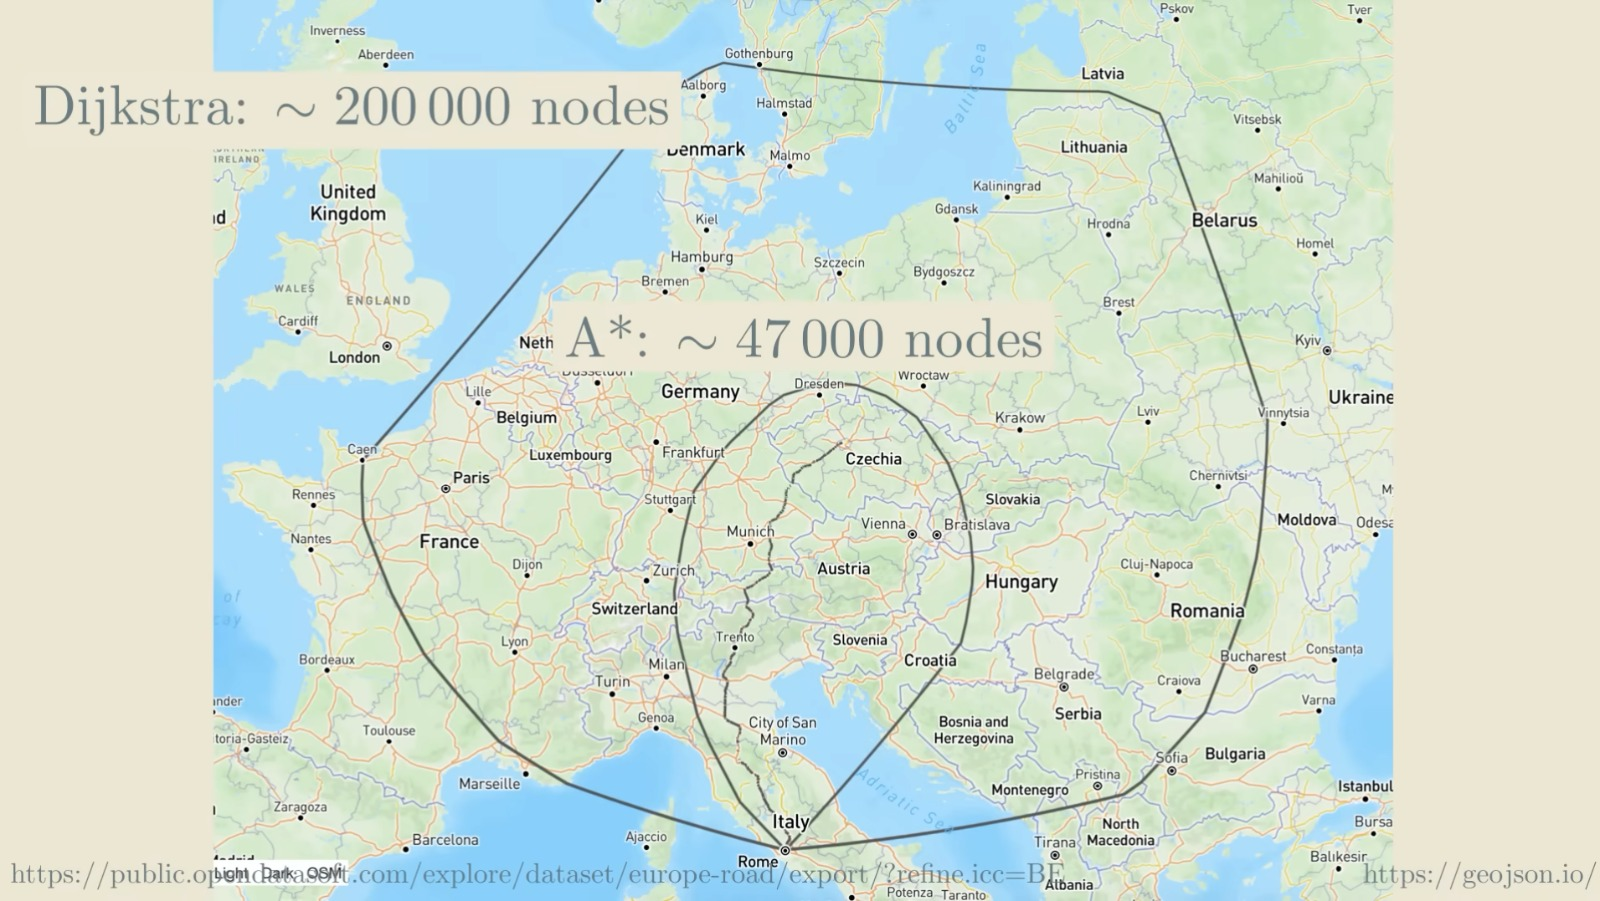

### **Aus den oben genannten Gründen entscheiden wir uns für den Dijkstra-Algorithmus für die Entwicklung von unserem Tool.**

## Das Tool (mit Dijkstra)[7][9]

In [59]:
class ToolDijkstra:
    def __init__(self, start, end):
        self.pos = pos_directed
        self.start = start
        self.end = end
        
        self.data = data_original
        self.closed_edges = []
        
        self.city_to_station = {}
        for e in self.data:
            self.city_to_station.update({self.get_city_name(e[0]) : e[0]})
        
        # dient zum Updaten
        self.duration, self.risk, self.price = self.get_all_edges(self.data)
        
        self.dijkstra_price = Dijkstra(self.price, True, self.start)
        self.bp_path, self.bp_chain, self.bp_price = self.dijkstra_price.get_path_data(self.start, self.end)
    
        self.dijkstra_duration = Dijkstra(self.duration, True, self.start)
        self.bd_path, self.bd_chain, self.bd_duration = self.dijkstra_duration.get_path_data(self.start, self.end)
        
        self.dijkstra_risk = Dijkstra(self.risk, True, self.start, risk=True)
        self.br_path, self.br_chain, self.br_risk = self.dijkstra_risk.get_path_data(self.start, self.end)
        
        self.bp_duration = self.dijkstra_duration.get_real_cost(self.bp_chain)
        self.bp_risk = self.dijkstra_risk.get_real_cost(self.bp_chain)
        
        self.bd_price = self.dijkstra_price.get_real_cost(self.bd_chain)
        self.bd_risk = self.dijkstra_risk.get_real_cost(self.bd_chain)
          
#         self.br_risk = self.dijkstra_risk.get_real_cost(self.br_chain)
        self.br_duration = self.dijkstra_duration.get_real_cost(self.br_chain)
        self.br_price = self.dijkstra_price.get_real_cost(self.br_chain)
        
        # Up to this point
        
        self.criteria = 'price'
        self.curr_edges = self.price
        self.curr_path = self.bp_path

        self.actualize_criteria()

    
    # Neuinitialisierung des Algorithmus nach der Änderung des Suchkriteriums
    def restart(self):
        self.duration, self.risk, self.price = self.get_all_edges(self.data)
        self.actualize_criteria()
        
        self.dijkstra_price = Dijkstra(self.price, True, self.start)
        self.bp_path, self.bp_chain, self.bp_price = self.dijkstra_price.get_path_data(self.start, self.end)
    
        self.dijkstra_duration = Dijkstra(self.duration, True, self.start)
        self.bd_path, self.bd_chain, self.bd_duration = self.dijkstra_duration.get_path_data(self.start, self.end)
        
        self.dijkstra_risk = Dijkstra(self.risk, True, self.start, risk=True)
        self.br_path, self.br_chain, self.br_duration = self.dijkstra_risk.get_path_data(self.start, self.end)
        
        self.bp_duration = self.dijkstra_duration.get_real_cost(self.bp_chain)
        self.bd_price = self.dijkstra_price.get_real_cost(self.bd_chain)
        self.br_risk = self.dijkstra_risk.get_real_cost(self.br_chain)
        
        # Aktualisierung des Kriteriums
    def actualize_criteria(self):
        if self.criteria == 'price':
            self.curr_edges = self.price
            self.curr_path = self.bp_path
        elif self.criteria == 'duration':
            self.curr_edges = self.duration
            self.curr_path = self.bd_path
        elif self.criteria == 'risk':
            self.curr_edges = self.risk
            self.curr_path = self.br_path
        
        # Plotfunktion für interne Nutzung
    def plot_par(self, edges, path):
        vis = DirectedGraph(self.pos, edges)
        vis.show_path(path)
        
        # Plotfunktion fürs äußere Nutzen
    def plot(self):
        self.plot_par(self.curr_edges, self.curr_path)
        
        # konvertierung der Minuten in Stunden und Minuten
    def convert_minutes(self, minutes):
        hours = minutes // 60
        remaining_minutes = minutes % 60
        return f'{hours}h {remaining_minutes}min'
        
        # Die Suche des Weges nach dem Zeitkriterium
    def get_shortest_way(self):
        self.criteria = 'duration'
        self.actualize_criteria()
        
        print(f'Der schnellste Weg von {self.start} nach {self.end} verläuft folgender Weise:')
        print(self.curr_path)
        print(f'Die Reise dauert {self.convert_minutes(self.bd_duration)} und kostet {round(self.bd_price,2)} €\n')
        print(f'Mit einer Durchschnittsauslastung von: {self.parse_risk(self.bd_risk)}')
        
        # Die Suche des Weges nach dem Preiskriterium
    def get_cheapest_way(self):
        self.criteria = 'price'
        self.actualize_criteria()
        
        print(f'Der günstigste Weg von {self.start} nach {self.end} verläuft folgender Weise:')
        print(self.curr_path)
        print(f'Die Reise dauert {self.convert_minutes(self.bp_duration)} und kostet {round(self.bp_price,2)} €\n')
        print(f'Mit einer Durchschnittsauslastung von: {self.parse_risk(self.bp_risk)}')
        
        # Die Suche nach dem Weg mit der geringsten Auslastung
    def get_least_risk_way(self):
        self.criteria = 'risk'
        self.actualize_criteria()
        
        print(f'Der am wenigsten ausgelastete Weg von {self.start} nach {self.end} verläuft folgender Weise:')
        print(self.curr_path)
        print(f'Die Reise dauert {self.convert_minutes(self.br_duration)} und kostet {round(self.br_price,2)} €\n')
        print(f'Mit einer Durchschnittsauslastung von: {self.parse_risk(self.br_risk)}')

    def parse_risk(self, risk):
        if risk < 1.5:
            return 'geringe Auslastung'
        elif risk < 2.0:
            return 'mittlere Auslastung'
        elif risk < 2.7:
            return 'hohe Auslastung'
        else:
            return 'sehr hohe Auslastung'
            
    
    #Erweiterung des Tools für Aufgabe  5
        # Die 'Sperrung' eines Kantes
    def close_edge(self, edge):
        sym_edge = (edge[1], edge[0])
        to_remove = [edge, sym_edge]
        #print(to_remove)
        self.closed_edges.extend([e for e in self.data if any(self.city_to_station.get(c[0]) == e[0] and self.city_to_station.get(c[1]) == e[1] for c in to_remove)])
        self.data = [e for e in self.data if not any(self.city_to_station.get(c[0]) == e[0] and self.city_to_station.get(c[1]) == e[1] for c in to_remove)]
        self.restart()
        
        # Die 'Sperrung' einer Verbindung in beide Richtugen
    def close_way(self, start, end):
        self.close_edge((start, end))
        self.close_edge((end, start))
    
        # Die 'Entsperrung' eines Kantes
    def open_edge(self, edge):
        start_station = self.city_to_station.get(edge[0])
        end_station = self.city_to_station.get(edge[1])
        for closed in self.closed_edges:
            if closed[0] == start_station and closed[1] == end_station:
                self.data.append(closed)
                self.closed_edges.remove(closed)
        self.restart()
        
        # Die 'Entsperrung' einer Verbindung in beide Richtugen
    def open_way(self, start, end):
        self.open_edge((start, end))
        self.open_edge((end, start))
        
        # Die 'Entsperrung' aller Verbindungen
    def open_all_ways(self):
        for edge in self.closed_edges:
            start = self.get_city_name(edge[0])
            end = self.get_city_name(edge[1])
            self.open_way(start, end)
        
        # Um eine bestimmte Stadt zu vermeiden, alle Verbindungen mit der Stadt sperren
    def avoid_city(self, city):
        station = self.city_to_station.get(city)
        for edge in self.data:
            if edge[0] == station:
                self.close_way(edge[0], edge[1])
    ### Ende Erweiterung
    
        # Konvertierung von Date-Time Format in Minuten
    def parse_duration(self, duration_str):
        hours, minutes, seconds = map(int, duration_str.split(':'))
        return hours * 60 + minutes + seconds / 60
        
        # Konvertierung des Bahnhofsnamen in den Stadtnamen
    def get_city_name(self, name):
        string = ''
        for symbol in name:
            if symbol == ' ' or symbol == '(':
                return string
            else:
                string += symbol
        return string
        
        # Aus dem Datensatz mit allen Angaben eines Kanten, drei Listen für Zeit, Preis und Auslastung
        # Im Format: [(start, end, Gewicht)]
    def get_all_edges(self, data):
        risk_map = {'low-to-medium' : 1, 'high': 2, 'very-high' : 3, 'unknown': 1}
        price = []
        duration = []
        risk = []
        for e in data:
            start = get_city_name(e[0])
            end = get_city_name(e[1])
            duration.append((start, end, parse_duration(e[2])))
            risk.append((start, end, risk_map.get(e[3])))
            if e[4] == "unknown":
                price.append((start, end, 20))  # Default price wenn unknown
            else:
                price.append((start, end, round(float(e[4]), 2)))
        return duration, risk, price

        

In [60]:
dtool = ToolDijkstra('Kassel', 'Mannheim')
dtool.get_cheapest_way()

Der günstigste Weg von Kassel nach Mannheim verläuft folgender Weise:
['Kassel', 'Frankfurt', 'Mannheim']
Die Reise dauert 2h 25min und kostet 52.8 €

Mit einer Durchschnittsauslastung von: hohe Auslastung


# Tool

In [61]:
import ipywidgets as widgets
from IPython.display import display

# Input widgets für Städte
start_city_input = widgets.Text(value='', description='Start:')
end_city_input = widgets.Text(value='', description='Ende:')

# Search Button
search_button = widgets.Button(description="Suche")
restart_button = widgets.Button(description="Wiederholen", layout=widgets.Layout(display='none'))

# Aktionen
cheapest_button = widgets.Button(description="Günstigste Strecke", layout=widgets.Layout(display='none'))
shortest_button = widgets.Button(description="Kürzeste Strecke", layout=widgets.Layout(display='none'))
least_risk_button = widgets.Button(description="Unausgelastete Strecke", layout=widgets.Layout(display='none'))
plot_button = widgets.Button(description="Karte", layout=widgets.Layout(display='none'))

# Output widget zum Plotten
output = widgets.Output()

# Funktion für ToolDijkstra 
def on_search_button_clicked(b):
    global tool
    start = start_city_input.value
    end = end_city_input.value
    if start and end:  # Ensure both cities are provided
        tool = ToolDijkstra(start, end)
        # Make input fields immutable
        start_city_input.disabled = True
        end_city_input.disabled = True
        # Show the action buttons and restart button
        cheapest_button.layout.display = 'inline-block'
        shortest_button.layout.display = 'inline-block'
        least_risk_button.layout.display = 'inline-block'
        plot_button.layout.display = 'inline-block'
        restart_button.layout.display = 'inline-block'
        # Hide the search button
        search_button.layout.display = 'none'

# Restart Funktion
def on_restart_button_clicked(b):
    # Hide action buttons and show search button and inputs
    cheapest_button.layout.display = 'none'
    shortest_button.layout.display = 'none'
    least_risk_button.layout.display = 'none'
    plot_button.layout.display = 'none'
    restart_button.layout.display = 'none'
    search_button.layout.display = 'inline-block'
    # Make input fields mutable again
    start_city_input.disabled = False
    end_city_input.disabled = False
    # Clear the output widget to remove any previous plots or logs
    output.clear_output()

# Callback Funktionen
def on_cheapest_button_clicked(b):
    with output:
        output.clear_output()
        tool.get_cheapest_way()

def on_shortest_button_clicked(b):
    with output:
        output.clear_output()
        tool.get_shortest_way()

def on_least_risk_button_clicked(b):
    with output:
        output.clear_output()
        tool.get_least_risk_way()
        
def on_plot_button_clicked(b):
    with output:
        output.clear_output()
        tool.plot()

# Callback Functions für die Buttons
search_button.on_click(on_search_button_clicked)
restart_button.on_click(on_restart_button_clicked)
cheapest_button.on_click(on_cheapest_button_clicked)
shortest_button.on_click(on_shortest_button_clicked)
least_risk_button.on_click(on_least_risk_button_clicked)
plot_button.on_click(on_plot_button_clicked)

# Display von Widgets
display(start_city_input, end_city_input, search_button, restart_button, cheapest_button, shortest_button, least_risk_button, plot_button, output)


Text(value='', description='Start:')

Text(value='', description='Ende:')

Button(description='Suche', style=ButtonStyle())

Button(description='Wiederholen', layout=Layout(display='none'), style=ButtonStyle())

Button(description='Günstigste Strecke', layout=Layout(display='none'), style=ButtonStyle())

Button(description='Kürzeste Strecke', layout=Layout(display='none'), style=ButtonStyle())

Button(description='Unausgelastete Strecke', layout=Layout(display='none'), style=ButtonStyle())

Button(description='Karte', layout=Layout(display='none'), style=ButtonStyle())

Output()

# Aufgabe 5 - Szenarien aus der Realität
# Erweiterung des Tools: Strecken sperren oder öffnen[18]

### Hintergrund

Die jüngsten Überflutungen in Deutschland haben gezeigt, wie wichtig es ist, ein flexibles und anpassungsfähiges Verkehrssystem zu haben. Während dieser Naturkatastrophen wurden viele Bahnstrecken durch Überschwemmungen unpassierbar, was zu erheblichen Störungen im Zugverkehr führte. Diese Ereignisse haben uns dazu inspiriert, die Notwendigkeit einer dynamischen Anpassung des Bahnnetzes in unsere Modelle und Algorithmen zu integrieren.

### Anpassungsfähigkeit des Bahnnetzes

Ein echtes Bahnnetz muss in der Lage sein, gefährdete oder unpassierbare Strecken schnell und effizient zu schließen und nach Behebung der Gefahrenquelle wieder zu öffnen. Dies erfordert eine dynamische Verwaltung der Verbindungen, die wir in unserer Simulation wie folgt umgesetzt haben:

- **close_edge**: Schließt eine spezifische Kante (Verbindung) im Graphen und entfernt die symmetrische Kante, um die Verbindung in beiden Richtungen zu sperren.
- **close_way**: Schließt eine Verbindung (Weg) zwischen zwei Städten in beiden Richtungen, indem beide Kanten (start->end und end->start) gesperrt werden.
- **open_edge**: Öffnet eine spezifische Kante (Verbindung) im Graphen und fügt die symmetrische Kante zurück hinzu, um die Verbindung in beiden Richtungen wiederherzustellen.
- **open_way**: Öffnet eine Verbindung (Weg) zwischen zwei Städten in beiden Richtungen, indem beide Kanten (start->end und end->start) wieder verfügbar gemacht werden.
- **open_all_ways**: Öffnet alle zuvor geschlossenen Verbindungen im Graphen und macht sie wieder verfügbar.
- **avoid_city**: Schließt alle Verbindungen, die zu einer bestimmten Stadt führen, um zu vermeiden, dass die Stadt Teil des berechneten Pfades wird.

**Siehe Klasse ToolDijkstra für Code**


# Anwendungsfall: Rundreise für Touristen mit Deutschland-Ticket

### Beschreibung des Anwendungsfalls[18]

Touristen, die Deutschland entdecken möchten, können dies kostengünstig und effizient mit dem Deutschland-Ticket tun. Dieses Ticket ermöglicht es ihnen, für einen fixen Preis von 49€ pro Monat durch ganz Deutschland zu reisen. Ein besonderer Vorteil des Deutschland-Tickets ist, dass es ausschließlich für regionale Züge gilt, was den Reisenden erhebliche Kosteneinsparungen ermöglicht und gleichzeitig dazu beiträgt, die Auslastung der regionalen Bahnverbindungen niedrig zu halten.

### Bedeutung für das neue Bahnnetz mit dem Deutschland-Ticket

- **Fixe Kostenstruktur**: Die Kantengewichte für die Kosten bleiben konstant, da das Deutschland-Ticket einen festen Preis von 49€ pro Monat hat.
- **Regionale Verbindungen**: Die Verbindungen bestehen ausschließlich aus regionalen Zügen, um die Nutzung des Deutschland-Tickets zu maximieren und Kosten zu sparen.

### Lösungsansatz

- **Priorisierung der Reisedauer**: Da die Kosten fix sind, wird die Dauer der Reisen zum entscheidenden Kriterium für die Planung der Rundreise.

### Erstellung einer neuen Datenbank für das DE-Ticket

#### Anpassung der get_info Funktion[11]

Hier ist die angepasste get_info Funktion, die sicherstellt, dass nur regionale Züge (RE, RB, S-Bahn) berücksichtigt werden:

In [62]:
'''
def get_info(from_id, to_id):
    url = f"https://v6.db.transport.rest/journeys?from={from_id}&to={to_id}&departure=2024-07-01T07:00&results=10"

    try:
        response = requests.get(url, timeout=30)
        print(f"{from_id} nach {to_id}")
        
        if response.status_code == 200:
            data = response.json()

            for journey in data['journeys']:
                for leg in journey['legs']:
                    if 'line' in leg:
                        product = leg['line']['product']
                        print(f"Gefundener Produkttyp: {product}")  # Debugging-Ausgabe
                        
                        if product in ['regionalExpress', 'regional', 'suburban']:
                            legs_first = journey['legs'][0]
                            legs_last = journey['legs'][-1]

                            start = legs_first['origin']['name']
                            ende = legs_last['destination']['name']
                            abfahrt = legs_first['departure']
                            ankunft = legs_last['arrival']

                            datetime_abfahrt = datetime.strptime(abfahrt, "%Y-%m-%dT%H:%M:%S%z")
                            datetime_ankunft = datetime.strptime(ankunft, "%Y-%m-%dT%H:%M:%S%z")
                            duration = datetime_ankunft - datetime_abfahrt

                            load_factor = legs_first.get('loadFactor', 'unknown')
                            price = journey['price']['amount'] if journey.get('price') else 'unknown'

                            print(f"von: {start} nach {ende} mit Abfahrt am {datetime_abfahrt.date()} um {datetime_abfahrt.time()} und Ankunft {ankunft}")
                            print(f"Zugtyp: {product}, Dauer: {duration}, Auslastung: {load_factor}, Preis: {price} EUR")
                            return start, ende, duration, load_factor, price
            
            print("Keine passenden Züge (RE, IR, RB, S) gefunden.")
        
        else:
            print("Fehler bei der Anfrage:", response.status_code)
    
    except requests.exceptions.Timeout:
        print("Die Anfrage hat zu lange gedauert und wurde beendet. Versuchen Sie es später noch einmal oder erhöhen Sie den Timeout-Wert.")
    
    except requests.exceptions.RequestException as e:
        print("Ein Fehler ist aufgetreten: ", e)

'''
0

0

## Visualisierung des neuen Bahnnetzes für das DE-Ticket
## Reisedauer

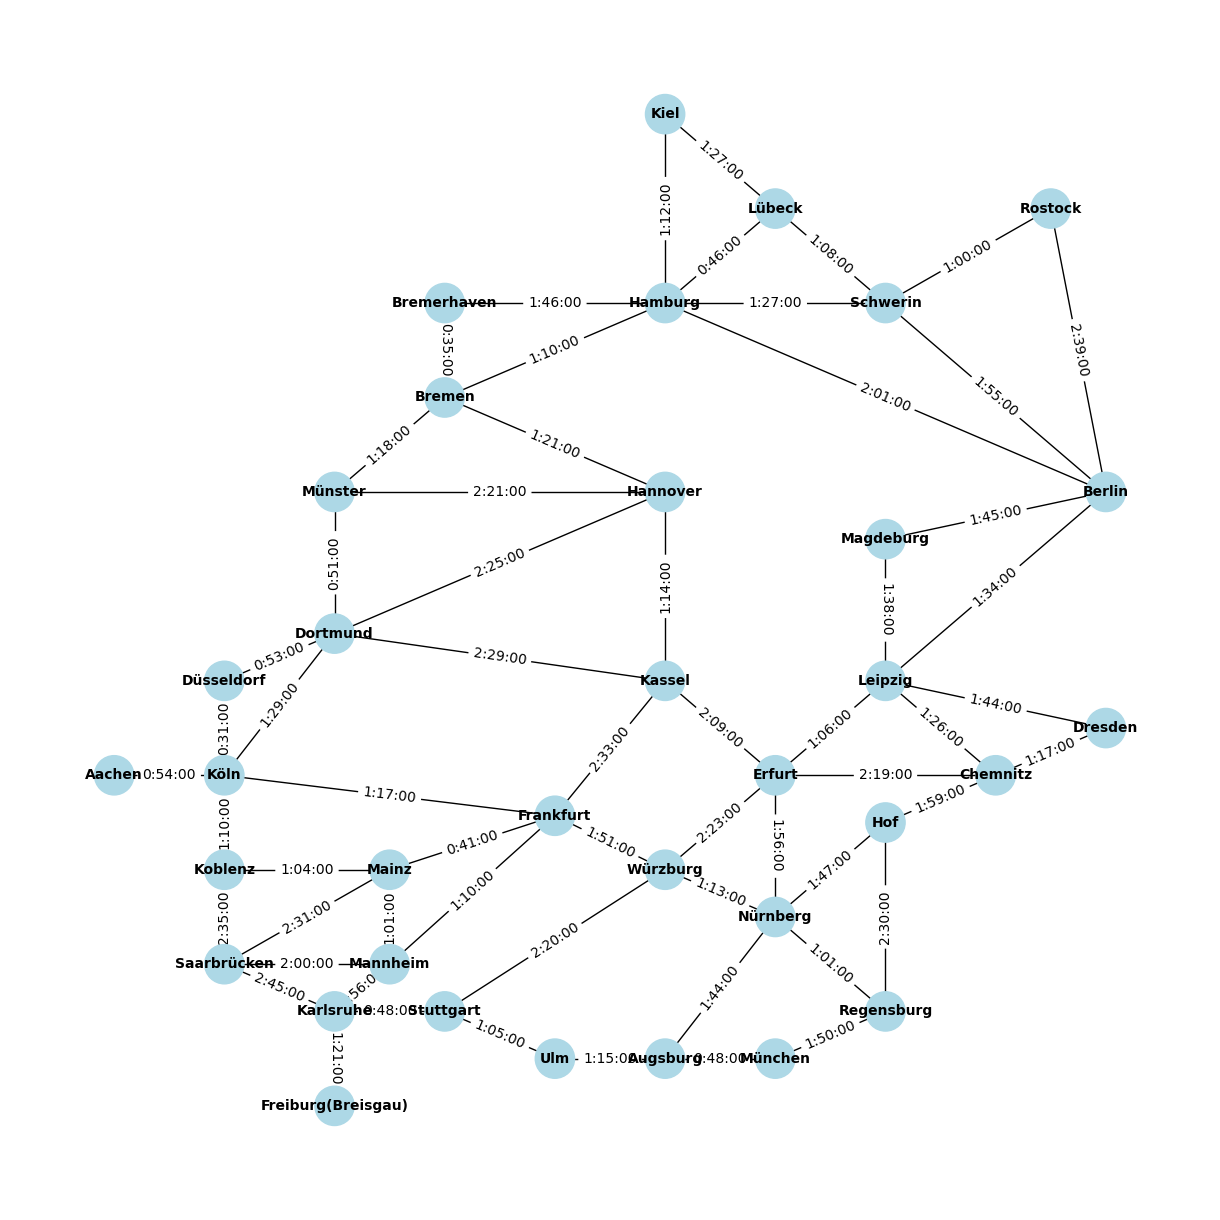

In [63]:
def simplify_name_5(name):
    return name.split(" Hbf")[0].split("(Main)")[0].split("(Westf)")[0].strip()

def parse_duration_5(duration_str):
    h, m, s = map(int, duration_str.split(':'))
    return timedelta(hours=h, minutes=m, seconds=s)

# Lesen der JSON-Datei
with open("DeTicket_data.json", "r") as json_file:
    json_data = json.load(json_file)

# Speichern der Einträge in einer Liste von Tupeln
data_ticket=[]
for entry in json_data:
        data_ticket.append((simplify_name_5(entry["start"]), simplify_name_5(entry["end"]), parse_duration_5(entry["duration"]), entry["risk"], entry["price"]))

#data
pos_5 = pos_n
pos_5['Freiburg(Breisgau)'] = (14, 3.5)
vis_n = Visualization(data_ticket, pos_5)
vis_n.draw()

## Auslastung

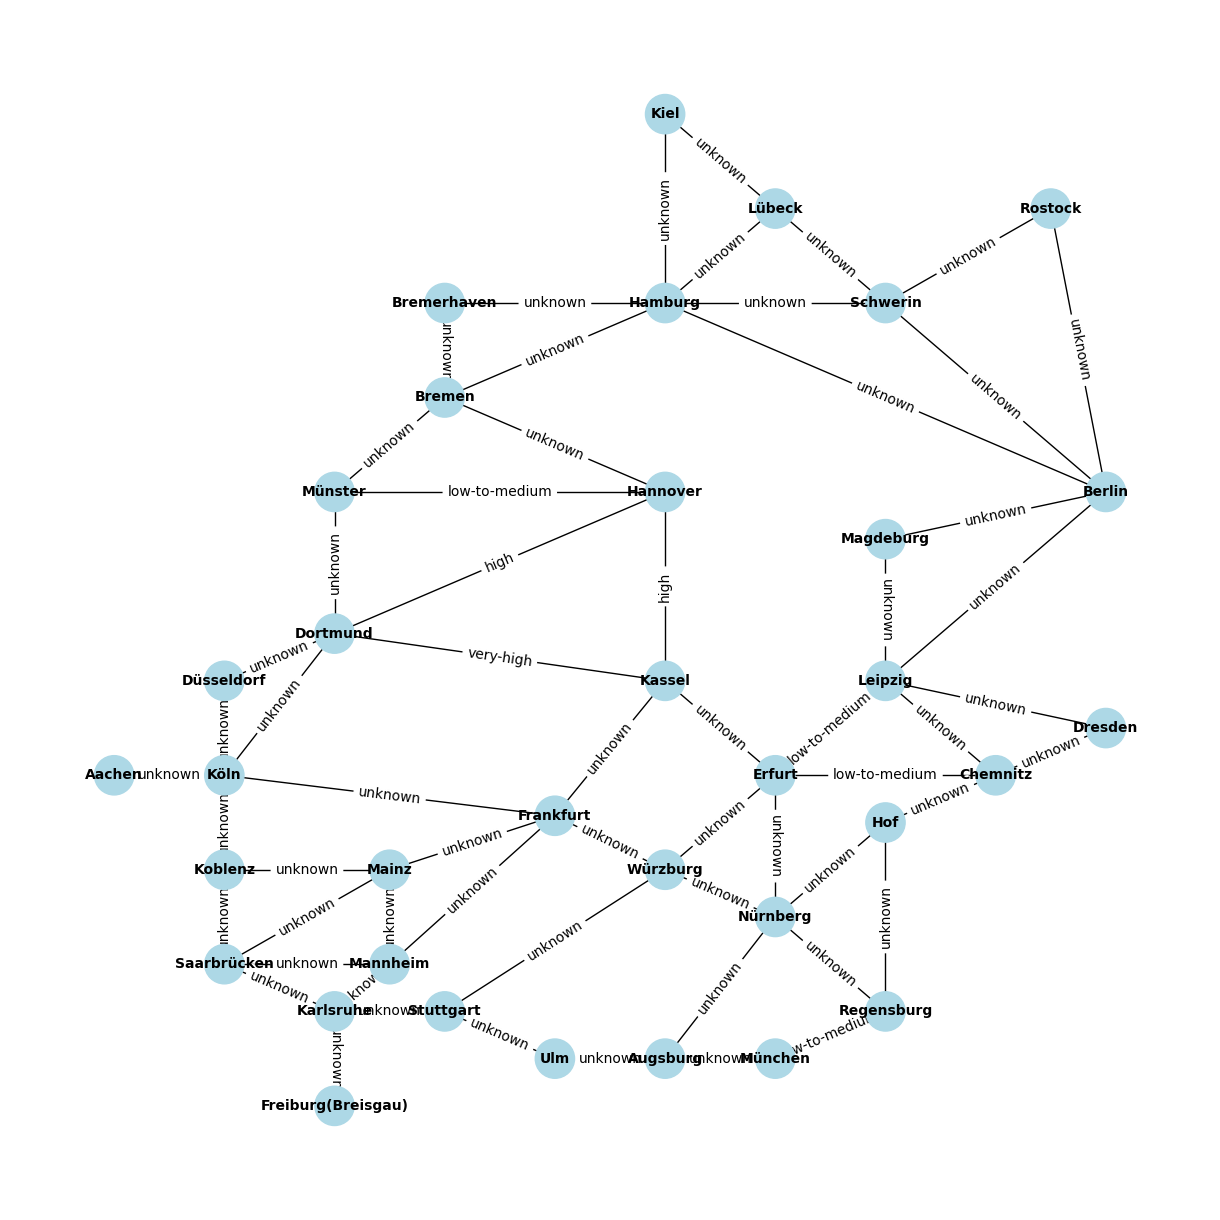

In [64]:
data_ticket_risk=[]
for entry in json_data:
        data_ticket_risk.append((simplify_name_5(entry["start"]), simplify_name_5(entry["end"]), entry["risk"] ))

#data
vis_n = Visualization(data_ticket_risk, pos_5)
vis_n.draw()

**Wir stellen fest, dass die Auslastung kein zuverlässiges Kriterium ist, um eine Rundreise zu empfehlen.**

### Fazit
Die Empfehlung der Rundreise basiert auf der Reisedauer.

### **Empfohlene Rundreisen**:

**Reise 1:**
Hamburg - Berlin - Leipzig - Dresden

**Reise 2:**
Stuttgart - Ulm - Augsburg - München - Regensburg

**Reise 3:**
Frankfurt - Köln - Dortmund - Hannover

Die empfohlenen Routen decken die wichtigsten Städte in Deutschland ab und gewährleisten, dass die Reisedauer für die Reisenden nicht zu hoch ist.



# Anwendungsfall: Neuer Bahnbetreiber

Ein neuer Bahnbetreiber plant, hochfrequentierte und teuere Strecken abzudecken. Diese Strecken entsprechen den ICE-Verbindungen zwischen den wichtigsten Städten Deutschlands.[18]

### Lösungsansatz:

1. **Erstellung eines neuen Bahnnetzes**:
   - Das Bahnnetz wird ausschließlich aus ICE-Zügen bestehen, die die wichtigsten Städte Deutschlands miteinander verbinden.

2. **Überprüfung der Kriterien**:
   - Sicherstellen, dass die ausgewählten Strecken eine hohe Auslastung aufweisen.
   - Validierung der hohen Kosten.


#### Anpassung der get_info Funktion[11]
Hier ist die angepasste get_info Funktion, die sicherstellt, dass nur ICE Züge berücksichtigt werden:

In [65]:
'''
def get_info(from_id, to_id):
    url = f"https://v6.db.transport.rest/journeys?from={from_id}&to={to_id}&departure=2024-06-20T07:00&results=10"

    try:
        response = requests.get(url, timeout=30)
        print(f"{from_id} nach {to_id}")
        
        if response.status_code == 200:
            data = response.json()

            for journey in data['journeys']:
                for leg in journey['legs']:
                    if 'line' in leg and leg['line']['product'] == 'nationalExpress' and leg['line']['productName'] == 'ICE':
                        product = leg['line']['product']
                        product_name = leg['line']['productName']
                        print(f"Gefundener Produkttyp: {product}, Name: {product_name}")  # Debugging-Ausgabe
                        
                        legs_first = journey['legs'][0]
                        legs_last = journey['legs'][-1]

                        start = legs_first['origin']['name']
                        ende = legs_last['destination']['name']
                        abfahrt = legs_first['departure']
                        ankunft = legs_last['arrival']

                        datetime_abfahrt = datetime.strptime(abfahrt, "%Y-%m-%dT%H:%M:%S%z")
                        datetime_ankunft = datetime.strptime(ankunft, "%Y-%m-%dT%H:%M:%S%z")
                        duration = datetime_ankunft - datetime_abfahrt

                        load_factor = legs_first.get('loadFactor', 'unknown')
                        price = journey['price']['amount'] if journey.get('price') else 'unknown'

                        print(f"von: {start} nach {ende} mit Abfahrt am {datetime_abfahrt.date()} um {datetime_abfahrt.time()} und Ankunft {ankunft}")
                        print(f"Zugtyp: {product_name}, Dauer: {duration}, Auslastung: {load_factor}, Preis: {price} EUR")
                        return start, ende, duration, load_factor, price
            
            print("Keine passenden ICE-Züge gefunden.")
        
        else:
            print("Fehler bei der Anfrage:", response.status_code)
    
    except requests.exceptions.Timeout:
        print("Die Anfrage hat zu lange gedauert und wurde beendet. Versuchen Sie es später noch einmal oder erhöhen Sie den Timeout-Wert.")
    
    except requests.exceptions.RequestException as e:
        print("Ein Fehler ist aufgetreten: ", e)

'''
0

0

## Auslastung

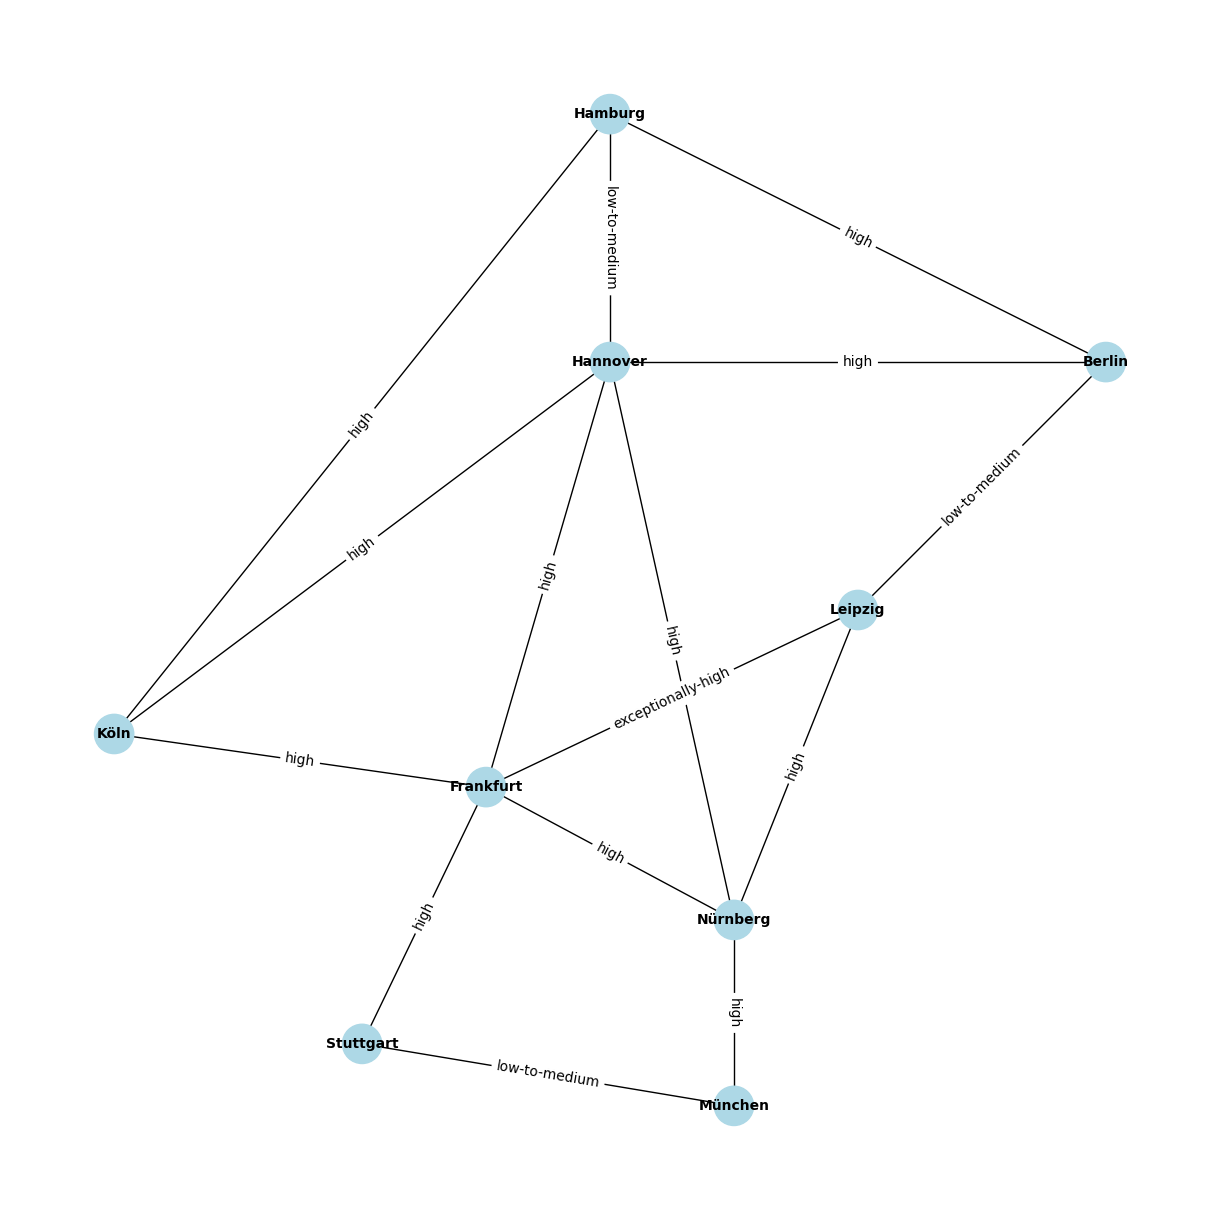

In [66]:
# Lesen der JSON-Datei
with open("ICE_Betreiber.json", "r") as json_file:
    json_data = json.load(json_file)

# Speichern der Einträge in einer Liste von Tupeln
data_ice=[]
for entry in json_data:
        data_ice.append((simplify_name_5(entry["start"]), simplify_name_5(entry["end"]), entry["risk"]))

#data
vis_n = Visualization(data_ice, pos_5)
vis_n.draw()

**Wir stellen fest, dass alle Verbindungen unseres ICE-Bahnnetzes eine hohe Auslastung haben. Damit ist das Kriterium erfüllt.**


## Preis

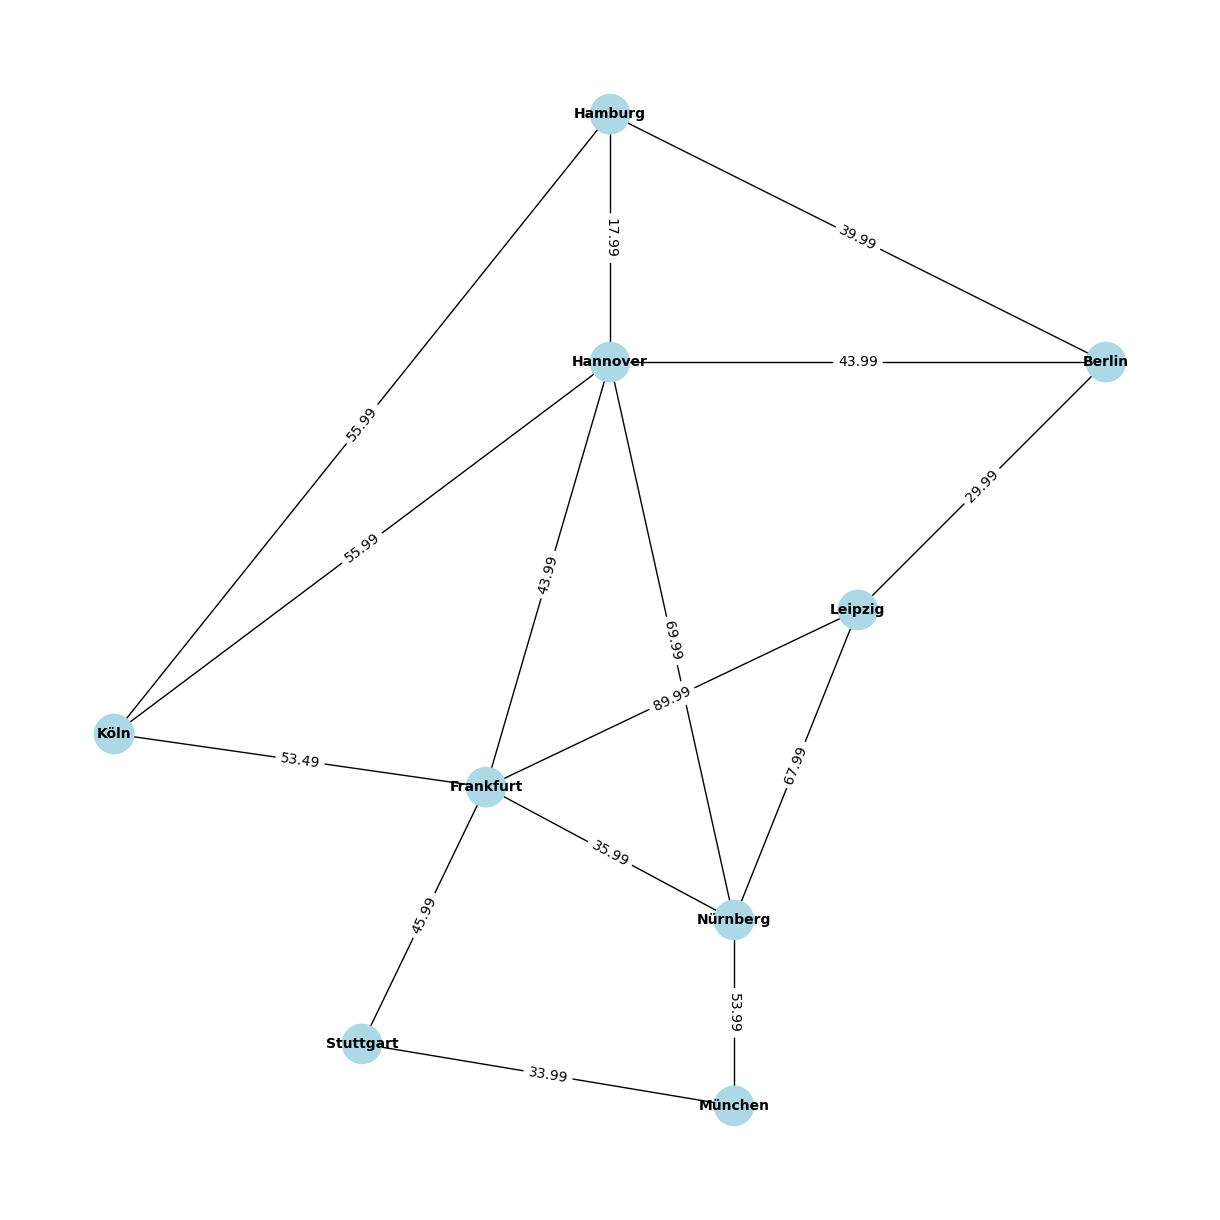

In [67]:
data_ice_price=[]
for entry in json_data:
        data_ice_price.append((simplify_name_5(entry["start"]), simplify_name_5(entry["end"]), entry["price"]))

#data
vis_n = Visualization(data_ice_price, pos_5)
vis_n.draw()

**Wir stellen fest, dass alle Verbindungen unseres ICE-Bahnnetzes überdurchschnittlich teuer sind. Damit ist das Kriterium erfüllt.**
### Fazit
Wir haben festgestellt, dass alle Verbindungen unseres ICE-Bahnnetzes hohe Auslastungen haben und überdurchschnittlich teuer sind. Alle Kriterien sind somit erfüllt. Der neue Bahnbetreiber kann nun unser entworfenes Bahnetz anbieten, das auf den wichtigsten und am stärksten frequentierten Strecken basiert.

# Quellen

In [68]:
from pybtex.database import parse_file
import re

from pybtex.database import parse_file
import re

bibfile = "Projekt3.bib"

def clean_latex_formatting(text):
    text = re.sub(r"(\{|\})", "", text)
    return text

def format_ieee(entry, entry_number):
    # Title bereinigen
    title = clean_latex_formatting(entry.fields.get('title', '[Title not found]'))
    
    # Autorenliste erstellen, falls vorhanden
    authors = entry.persons.get('author', None)
    if authors:
        authors = ' and '.join(' '.join(p.first_names + p.last_names) for p in authors)
    else:
        authors = title  # Use title if author is not available
    
    year = entry.fields.get('year', '[Year not found]')
    url = entry.fields.get('url', '')

    # Formatieren basierend auf dem Eintragstyp
    if 'booktitle' in entry.fields:  # for conference papers
        booktitle = clean_latex_formatting(entry.fields.get('booktitle'))
        citation = f"[{entry_number}] {authors}, \"{title},\" in {booktitle}, {year}."
    if 'wikipedia.org' in url:
        # Formatting Wikipedia-specific reference
        citation = f"[{entry_number}] \"{title},\" Wikipedia, {year}. [Online]. Available: {url}."
    elif 'journal' in entry.fields:  # for journal articles
        journal = clean_latex_formatting(entry.fields.get('journal'))
        volume = entry.fields.get('volume', '[Volume not found]')
        number = entry.fields.get('number', '[Issue not found]')
        pages = entry.fields.get('pages', '[Pages not found]')
        citation = f"[{entry_number}] {authors}, \"{title},\" {journal}, vol. {volume}, no. {number}, pp. {pages}, {year}."
    elif entry.type == 'book':  # for books
        publisher = clean_latex_formatting(entry.fields.get('publisher', '[Publisher not found]'))
        citation = f"[{entry_number}] {authors}, {title}. {publisher}, {year}."
    else:  # for other types
        citation = f"[{entry_number}] {authors}, {title}, {year}."

    return citation

# BibTeX-Datei lesen
bib_data = parse_file(bibfile)

# Alle Einträge im IEEE-Stil konvertieren
ieee_references = [format_ieee(entry, i+1) for i, (key, entry) in enumerate(bib_data.entries.items())]

# Alle IEEE-Stil Zitate ausgeben
print("\033[1mQuellen\033[0m ")
print('')
for ref in ieee_references:
    print(ref)
    print('')


Quellen 

[1] "Zug um Zug (Spiel)," Wikipedia, 2024. [Online]. Available: https://de.wikipedia.org/w/index.php?title=Zug_um_Zug_(Spiel)&oldid=245226275.

[2] Zug um Zug: Deutschland, "Zug um Zug: Deutschland," Spielbasis Ruhr, vol. [Volume not found], no. [Issue not found], pp. [Pages not found], [Year not found].

[3] Matplotlib — Visualization with Python, Matplotlib — Visualization with Python, [Year not found].

[4] NetworkX — NetworkX documentation, NetworkX — NetworkX documentation, [Year not found].

[5] "Adjazenzmatrix," Wikipedia, 2024. [Online]. Available: https://de.wikipedia.org/w/index.php?title=Adjazenzmatrix&oldid=242752433.

[6] Zug um Zug Deutschland - Play different.™ \textbar Days of Wonder, "Zug um Zug Deutschland - Play different.™ \textbar Days of Wonder," www.google.com, vol. [Volume not found], no. [Issue not found], pp. [Pages not found], [Year not found].

[7] {Studyflix}, Dijkstra Algorithmus - Beispiel mit Graph und Tabelle veranschaulicht!, 2019.

[8] {poly